# Scorecard Development

In [1]:
#Import Required Libraries
import numpy as np
import pandas as pd

In [2]:
#Read Input file
df = pd.read_csv("loan_data_2015.csv")

C:\Users\Yogesh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (19,47,55) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#Import Important Libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import chi2_contingency

In [4]:
pd.options.display.max_columns = None

In [5]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,60516983,64537751,20000,20000,20000,36 months,12.29,667.06,C,C1,Accounting Clerk,1 year,OWN,65000.0,Source Verified,Sep-15,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,542xx,WI,20.72,0,Sep-00,1,NaN,NaN,25,0,31578,77.0,42,w,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN,0.00,NaN,Jan-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,0,52303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41000,NaN,NaN,NaN
1,60187139,64163931,11000,11000,11000,36 months,12.69,369.00,C,C2,Accounts Payable Lead,7 years,MORTGAGE,40000.0,Source Verified,Sep-15,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,235xx,VA,24.57,0,Sep-02,0,36.0,80.0,13,1,5084,38.8,41,w,0.0,0.0,10043.49,10043.49,9942.67,100.81,0.0,0.0,0.0,Oct-15,10059.00,NaN,Jan-16,0,79.0,1,INDIVIDUAL,NaN,NaN,NaN,0,332,175731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13100,NaN,NaN,NaN
2,60356453,64333218,7000,7000,7000,36 months,9.99,225.84,B,B3,Nurse,6 years,MORTGAGE,32000.0,Source Verified,Sep-15,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,350xx,AL,32.41,0,Feb-06,1,NaN,NaN,18,0,12070,74.0,36,f,0.0,0.0,221.96,221.96,167.56,54.40,0.0,0.0,0.0,Oct-15,225.84,NaN,Jan-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,0,202012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16300,NaN,NaN,NaN
3,59955769,63900496,10000,10000,10000,36 months,10.99,327.34,B,B4,Service Manager,10+ years,MORTGAGE,48000.0,Source Verified,Sep-15,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,483xx,MI,30.98,0,Oct-99,2,NaN,NaN,18,0,22950,66.0,41,f,0.0,0.0,315.13,315.13,235.76,79.37,0.0,0.0,0.0,Oct-15,327.34,NaN,Jan-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,0,108235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34750,NaN,NaN,NaN
4,58703693,62544456,9550,9550,9550,36 months,19.99,354.87,E,E4,NaN,NaN,RENT,32376.0,Verified,Sep-15,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,546xx,WI,32.54,0,Nov-99,3,69.0,NaN,9,0,4172,29.6,26,w,0.0,0.0,333.66,333.66,195.78,137.88,0.0,0.0,0.0,Oct-15,354.87,NaN,Jan-16,0,69.0,1,INDIVIDUAL,NaN,NaN,NaN,0,0,45492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14100,NaN,NaN,NaN


In [6]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           421094 non-null  int64  
 1   member_id                    421094 non-null  int64  
 2   loan_amnt                    421094 non-null  int64  
 3   funded_amnt                  421094 non-null  int64  
 4   funded_amnt_inv              421094 non-null  int64  
 5   term                         421094 non-null  object 
 6   int_rate                     421094 non-null  float64
 7   installment                  421094 non-null  float64
 8   grade                        421094 non-null  object 
 9   sub_grade                    421094 non-null  object 
 10  emp_title                    397220 non-null  object 
 11  emp_length                   397277 non-null  object 
 12  home_ownership               421094 non-null  object 
 13 

# Missing value Treatment

In [8]:
nulls = df.isnull().mean()

In [9]:
#Delete All columns with Nulls Greater than 80%
nulls_del_lst = nulls[nulls > 0.8].index.tolist()

In [10]:
df.drop(nulls_del_lst, axis = 1, inplace = True)

In [11]:
df.shape

(421094, 55)

In [12]:
[df.emp_title.value_counts() > 1]

[Teacher                    True
 Manager                    True
 Owner                      True
 Registered Nurse           True
 RN                         True
                           ...  
 Forklif driver            False
 Support Del Manager       False
 Senior Manager Sales      False
 Mortgage post closing     False
 Supply Operator           False
 Name: emp_title, Length: 120811, dtype: bool]

In [13]:
# Drop all Not required columns
df.drop(columns = ['id', 'member_id', 'sub_grade', 'emp_title', 'url', 'title', 'zip_code', 'next_pymnt_d',
            'recoveries', 'collection_recovery_fee', 'total_rec_prncp', 'total_rec_late_fee'], inplace = True)

In [14]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,20000,20000,20000,36 months,12.29,667.06,C,1 year,OWN,65000.0,Source Verified,Sep-15,Charged Off,n,debt_consolidation,WI,20.72,0,Sep-00,1,NaN,25,0,31578,77.0,42,w,0.0,0.0,0.00,0.00,0.00,NaN,0.00,Jan-16,0,NaN,1,INDIVIDUAL,0,0,52303,41000
1,11000,11000,11000,36 months,12.69,369.00,C,7 years,MORTGAGE,40000.0,Source Verified,Sep-15,Charged Off,n,debt_consolidation,VA,24.57,0,Sep-02,0,36.0,13,1,5084,38.8,41,w,0.0,0.0,10043.49,10043.49,100.81,Oct-15,10059.00,Jan-16,0,79.0,1,INDIVIDUAL,0,332,175731,13100
2,7000,7000,7000,36 months,9.99,225.84,B,6 years,MORTGAGE,32000.0,Source Verified,Sep-15,Charged Off,n,debt_consolidation,AL,32.41,0,Feb-06,1,NaN,18,0,12070,74.0,36,f,0.0,0.0,221.96,221.96,54.40,Oct-15,225.84,Jan-16,0,NaN,1,INDIVIDUAL,0,0,202012,16300
3,10000,10000,10000,36 months,10.99,327.34,B,10+ years,MORTGAGE,48000.0,Source Verified,Sep-15,Charged Off,n,credit_card,MI,30.98,0,Oct-99,2,NaN,18,0,22950,66.0,41,f,0.0,0.0,315.13,315.13,79.37,Oct-15,327.34,Jan-16,0,NaN,1,INDIVIDUAL,0,0,108235,34750
4,9550,9550,9550,36 months,19.99,354.87,E,NaN,RENT,32376.0,Verified,Sep-15,Charged Off,n,debt_consolidation,WI,32.54,0,Nov-99,3,69.0,9,0,4172,29.6,26,w,0.0,0.0,333.66,333.66,137.88,Oct-15,354.87,Jan-16,0,69.0,1,INDIVIDUAL,0,0,45492,14100


In [15]:
df['loan_status'].value_counts(normalize = True)

Current               0.896600
Fully Paid            0.054582
Issued                0.020091
Late (31-120 days)    0.011140
In Grace Period       0.007378
Charged Off           0.006585
Late (16-30 days)     0.002705
Default               0.000919
Name: loan_status, dtype: float64

In [16]:
# Creating Target variable, assigning 1 for Good and 0 for bad for coding and logic
df['good_bad'] = np.where(df['loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)',
                                    'Does not meet the credit policy. Status:Charged Off']),0,1)

In [17]:
df['good_bad'].value_counts(normalize = True)

1    0.981356
0    0.018644
Name: good_bad, dtype: float64

In [18]:
df.drop('loan_status', axis = 1, inplace = True)

In [19]:
df['emp_length'].value_counts(), df['emp_length'].unique()

(10+ years    141520
 2 years       37497
 < 1 year      34340
 3 years       33430
 1 year        27473
 5 years       24930
 4 years       24506
 8 years       21560
 7 years       18414
 6 years       16838
 9 years       16769
 Name: emp_length, dtype: int64,
 array(['1 year', '7 years', '6 years', '10+ years', nan, '8 years',
        '9 years', '3 years', '4 years', '< 1 year', '2 years', '5 years'],
       dtype=object))

## Data Trasnformation as required

In [20]:
# A Function to convert Emp_Length variable into required format and convert to Numeric

def emp_convert(ds, col):
    ds[col] = ds[col].str.replace("< 1 year", str(0))
    ds[col] = ds[col].str.replace("\+ years", "")
    ds[col] = ds[col].str.replace(" years", "")
    ds[col] = ds[col].str.replace(" year", "")
    
    ds[col] = pd.to_numeric(ds[col])

In [21]:
emp_convert(df, "emp_length")

<ipython-input-20-66b521475819>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  ds[col] = ds[col].str.replace("\+ years", "")


In [22]:
df['emp_length'].value_counts()

10.0    141520
2.0      37497
0.0      34340
3.0      33430
1.0      27473
5.0      24930
4.0      24506
8.0      21560
7.0      18414
6.0      16838
9.0      16769
Name: emp_length, dtype: int64

In [23]:
# A Function to transfer all dates into Difference of Month between today and date as mentioned in respective column
def date_convert(ds, col):
    today = pd.to_datetime("2023-07-01")
    ds[col] = pd.to_datetime(ds[col], format = "%b-%y")
    ds['mths_since_' + col] = round(pd.to_numeric((today - ds[col]) / np.timedelta64(1,"M")))
    ds['mths_since_' + col] = np.where(ds['mths_since_' + col] < 0, ds['mths_since_' + col].max(), 
                                       ds['mths_since_' + col])
    ds.drop(col, axis = 1, inplace = True)

In [24]:
date_convert(df, 'earliest_cr_line')

In [25]:
df['mths_since_earliest_cr_line'].describe()

count    421094.000000
mean        297.471220
std          90.827636
min         128.000000
25%         235.000000
50%         279.000000
75%         345.000000
max         654.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [26]:
date_convert(df, 'issue_d')

In [27]:
date_convert(df, 'last_pymnt_d')

In [28]:
date_convert(df, 'last_credit_pull_d')

In [29]:
print(df['mths_since_earliest_cr_line'].describe())
print(df['mths_since_issue_d'].describe())
print(df['mths_since_last_pymnt_d'].describe())
print(df['mths_since_last_credit_pull_d'].describe())

count    421094.000000
mean        297.471220
std          90.827636
min         128.000000
25%         235.000000
50%         279.000000
75%         345.000000
max         654.000000
Name: mths_since_earliest_cr_line, dtype: float64
count    421094.000000
mean         96.044629
std           3.458162
min          91.000000
25%          93.000000
50%          96.000000
75%          99.000000
max         102.000000
Name: mths_since_issue_d, dtype: float64
count    403811.000000
mean         90.507321
std           1.289571
min          90.000000
25%          90.000000
50%          90.000000
75%          91.000000
max         102.000000
Name: mths_since_last_pymnt_d, dtype: float64
count    421083.000000
mean         90.151609
std           0.895244
min          90.000000
25%          90.000000
50%          90.000000
75%          90.000000
max         103.000000
Name: mths_since_last_credit_pull_d, dtype: float64


In [30]:
df['term'].value_counts()

 36 months    283172
 60 months    137922
Name: term, dtype: int64

In [31]:
df['term'] = df['term'].str.replace(" months", "")
df['term'] = pd.to_numeric(df['term'])

In [32]:
x = df.drop('good_bad', axis = 1)
y = df['good_bad']

In [33]:
purpose_grp = df['purpose'].value_counts(ascending = True).index.tolist()[:3]

In [34]:
# Data tranformation for Purpose variable
df['purpose'] = np.where(df['purpose'].isin(purpose_grp), "other", df['purpose'])

In [35]:
df['initial_list_status'].value_counts()

w    267251
f    153843
Name: initial_list_status, dtype: int64

In [36]:
#df.drop('initial_list_status', axis = 1, inplace = True)

## Bifurcating Numeric and categorical Variables for Further Processing

In [37]:
# Bifurcating categorical and Numeric variables

cat = x.select_dtypes(include = 'object')
num = x.select_dtypes(include = 'number')

In [38]:
cat.shape, num.shape

((421094, 8), (421094, 34))

## Variables selection for categorical variable Using Chi_Square

In [39]:
# This code will find relevance of Categorical variables and help us to discard variable based on Pvalue

In [40]:
chi2_res = {}

for col in cat.columns:
    chi, p, dof, ex = chi2_contingency(pd.crosstab(y, cat[col]))
    chi2_res.setdefault("Feature", []).append(col)
    chi2_res.setdefault("p-value",[]).append(round(p,6))
    chi2_res.setdefault("Chi_val", []).append(chi)

In [41]:
chi2_df = pd.DataFrame(data = chi2_res)

In [42]:
chi2_df

,Feature,p-value,Chi_val
0,grade,0.000000,5413.589083
1,home_ownership,0.000000,335.816683
2,verification_status,0.000000,344.542227
3,pymnt_plan,0.000373,12.663708
4,purpose,0.000000,489.186445
5,addr_state,0.000000,231.445531
6,initial_list_status,0.000000,1026.547539
7,application_type,0.021471,5.288139


In [43]:
chi2_df.sort_values(by = ['p-value'], ascending = True, 
                    ignore_index = True, inplace = True)

In [44]:
# Not considering last variable "application_type"
chi2_df = chi2_df[:-1]

In [45]:
cat_lst = chi2_df.Feature.values.tolist()

In [46]:
cat = cat[cat_lst]

In [47]:
#Dropping "addr_state", "pymnt_plan"
cat.drop(['addr_state', 'pymnt_plan'], axis = 1, inplace = True)

In [48]:
cat.shape, num.shape

((421094, 5), (421094, 34))

In [49]:
num.isnull().mean()

loan_amnt                        0.000000
funded_amnt                      0.000000
funded_amnt_inv                  0.000000
term                             0.000000
int_rate                         0.000000
installment                      0.000000
emp_length                       0.056560
annual_inc                       0.000000
dti                              0.000000
delinq_2yrs                      0.000000
inq_last_6mths                   0.000000
mths_since_last_delinq           0.484360
open_acc                         0.000000
pub_rec                          0.000000
revol_bal                        0.000000
revol_util                       0.000385
total_acc                        0.000000
out_prncp                        0.000000
out_prncp_inv                    0.000000
total_pymnt                      0.000000
total_pymnt_inv                  0.000000
total_rec_int                    0.000000
last_pymnt_amnt                  0.000000
collections_12_mths_ex_med       0

In [50]:
df['mths_since_last_major_derog'].value_counts(normalize = True)

64.0     0.015978
38.0     0.015269
67.0     0.015106
70.0     0.015090
66.0     0.015049
           ...   
155.0    0.000008
159.0    0.000008
157.0    0.000008
171.0    0.000008
154.0    0.000008
Name: mths_since_last_major_derog, Length: 162, dtype: float64

In [51]:
df['mths_since_last_delinq'].value_counts(normalize = True).index.tolist()[0]

6.0

In [52]:
df['emp_length'].value_counts(normalize = True).index.tolist()[0]

10.0

In [53]:
df['emp_length'].fillna(df['emp_length'].value_counts(normalize = True).index.tolist()[0], inplace = True)

In [54]:
num['emp_length'].value_counts(normalize = True)

10.0    0.356225
2.0     0.094385
0.0     0.086438
3.0     0.084148
1.0     0.069153
5.0     0.062752
4.0     0.061685
8.0     0.054269
7.0     0.046351
6.0     0.042384
9.0     0.042210
Name: emp_length, dtype: float64

In [55]:
num['emp_length'].fillna(num['emp_length'].value_counts(normalize = True).index.tolist()[0], inplace = True)

C:\Users\Yogesh\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [56]:
num['mths_since_last_delinq'].fillna(num['mths_since_last_delinq'].value_counts(normalize = True).index.tolist()[0], inplace = True)

In [57]:
num['revol_util'].fillna(num['revol_util'].mean(), inplace = True)

In [58]:
num['mths_since_last_delinq'].fillna(0, inplace = True)

In [59]:
num.drop(['mths_since_last_major_derog'], axis = 1, inplace = True)

C:\Users\Yogesh\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [60]:
num['mths_since_last_pymnt_d'].fillna(num['mths_since_last_pymnt_d'].mean(), inplace = True)
num['mths_since_last_credit_pull_d'].fillna(num['mths_since_last_credit_pull_d'].mean(), inplace = True)

In [61]:
cat.head()

,grade,home_ownership,verification_status,purpose,initial_list_status
0,C,OWN,Source Verified,debt_consolidation,w
1,C,MORTGAGE,Source Verified,debt_consolidation,w
2,B,MORTGAGE,Source Verified,debt_consolidation,f
3,B,MORTGAGE,Source Verified,credit_card,f
4,E,RENT,Verified,debt_consolidation,w


In [62]:
cat.isnull().sum()

grade                  0
home_ownership         0
verification_status    0
purpose                0
initial_list_status    0
dtype: int64

## Variable selection for Numeric Variable 

In [63]:
fstats = f_classif(num, y)[0]
pval = f_classif(num, y)[1]

C:\Users\Yogesh\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [24] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Yogesh\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Yogesh\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [24] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Yogesh\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [64]:
fstats, pval

(array([2.78179075e+00, 2.78179075e+00, 2.80654956e+00, 2.24118076e+02,
        5.49259395e+03, 5.27045214e+01, 6.80575317e+01, 5.80423014e+01,
        4.70337716e+01, 1.68833703e+01, 6.02160122e+02, 1.27564770e+01,
        1.35741047e+01, 1.80462066e+00, 4.65684148e+01, 1.04781135e+02,
        1.34082919e+01, 1.57583251e+03, 1.57582102e+03, 2.76774048e+02,
        2.76702966e+02, 2.25074128e+02, 2.63303806e+02, 1.76581867e+01,
                   nan, 2.15212409e+01, 1.98182811e-01, 1.94755770e+02,
        1.72376182e+02, 1.95159492e+02, 6.23429671e+03, 6.06281887e+04,
        5.76145201e+02]),
 array([9.53422550e-002, 9.53422550e-002, 9.38808410e-002, 1.17821536e-050,
        0.00000000e+000, 3.88361511e-013, 1.59244131e-016, 2.57072622e-014,
        6.98695631e-012, 3.97558090e-005, 7.04156280e-133, 3.54818017e-004,
        2.29356043e-004, 1.79155606e-001, 8.85937230e-012, 1.37308709e-024,
        2.50545066e-004, 0.00000000e+000, 0.00000000e+000, 3.96722215e-062,
        4.11118511

In [65]:
anova_df = pd.DataFrame(data = {'Num_feature': num.columns.values,
                                'F-Score' : fstats,
                                'p_value' : pval})

In [66]:
anova_df.sort_values(by = 'F-Score', ascending = True, 
                    ignore_index = True, inplace = True)

In [67]:
anova_df.dropna(inplace=True)

In [68]:
anova_df = anova_df.loc[5:,:]

In [69]:
anova_df.reset_index(inplace = True, drop = True)

In [70]:
anova_df

,Num_feature,F-Score,p_value
0,mths_since_last_delinq,12.756477,3.548180e-04
1,total_acc,13.408292,2.505451e-04
2,open_acc,13.574105,2.293560e-04
3,delinq_2yrs,16.883370,3.975581e-05
4,collections_12_mths_ex_med,17.658187,2.644292e-05
5,acc_now_delinq,21.521241,3.500362e-06
6,revol_bal,46.568415,8.859372e-12
7,dti,47.033772,6.986956e-12
8,installment,52.704521,3.883615e-13
9,annual_inc,58.042301,2.570726e-14


In [71]:
top_num_col = anova_df['Num_feature'].values.tolist()

In [72]:
corrmat = num[top_num_col].corr()

In [73]:
mask = np.triu(np.ones_like(corrmat, dtype = np.bool))

<ipython-input-73-663a3d8d4c97>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corrmat, dtype = np.bool))


Text(0.5, 1.0, 'Pearson correlation')

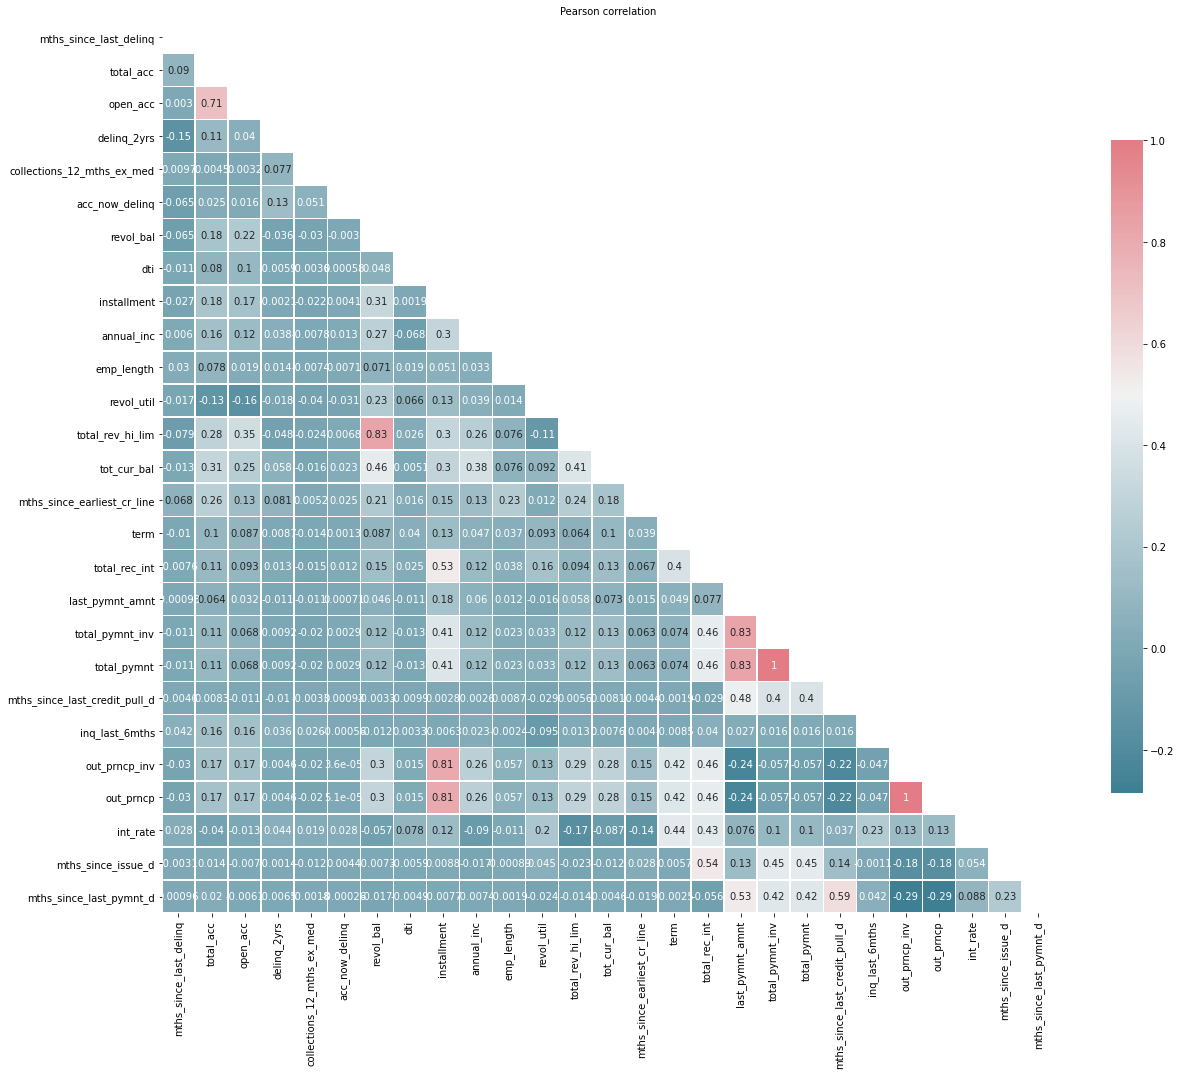

In [74]:
f, ax = plt.subplots(figsize=(20,20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corrmat, cmap= cmap, mask= mask, vmax=1, center=0.5,
            square=True, linewidths=.5, cbar_kws={"shrink": .6},annot=True)

plt.title("Pearson correlation", fontsize =10)

In [75]:
num.corr().columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'mths_since_earliest_cr_line', 'mths_since_issue_d',
       'mths_since_last_pymnt_d', 'mths_since_last_credit_pull_d'],
      dtype='object')

## Function to Remove Multi Collinearity

In [76]:
def correlation(data, threshold):
    col_corr = set()
    corr_mat = data.corr()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if i != j:
                if abs(corr_mat.iloc[i,j]) >= threshold and corr_mat.columns[i] not in col_corr:
                    if (data.iloc[:,i].corr(df['good_bad'])) <= (data.iloc[:,j].corr(df['good_bad'])):
                        col_name = corr_mat.columns[i]
                    else:
                        col_name = corr_mat.columns[j]
                    col_corr.add(col_name)
                
    return col_corr

In [77]:
lst_drop = correlation(num[top_num_col], 0.8)

In [78]:
num = num[top_num_col]

In [79]:
num.shape

(421094, 27)

In [80]:
lst_drop

{'installment',
 'last_pymnt_amnt',
 'out_prncp_inv',
 'revol_bal',
 'total_pymnt_inv'}

In [81]:
num.drop(lst_drop, axis = 1, inplace = True)

In [82]:
num.head()

,mths_since_last_delinq,total_acc,open_acc,delinq_2yrs,collections_12_mths_ex_med,acc_now_delinq,dti,annual_inc,emp_length,revol_util,total_rev_hi_lim,tot_cur_bal,mths_since_earliest_cr_line,term,total_rec_int,total_pymnt,mths_since_last_credit_pull_d,inq_last_6mths,out_prncp,int_rate,mths_since_issue_d,mths_since_last_pymnt_d
0,6.0,42,25,0,0,0,20.72,65000.0,1.0,77.0,41000,52303,274.0,36,0.00,0.00,90.0,1,0.0,12.29,94.0,90.507321
1,36.0,41,13,0,0,0,24.57,40000.0,7.0,38.8,13100,175731,250.0,36,100.81,10043.49,90.0,0,0.0,12.69,94.0,93.000000
2,6.0,36,18,0,0,0,32.41,32000.0,6.0,74.0,16300,202012,209.0,36,54.40,221.96,90.0,1,0.0,9.99,94.0,93.000000
3,6.0,41,18,0,0,0,30.98,48000.0,10.0,66.0,34750,108235,285.0,36,79.37,315.13,90.0,2,0.0,10.99,94.0,93.000000
4,69.0,26,9,0,0,0,32.54,32376.0,10.0,29.6,14100,45492,284.0,36,137.88,333.66,90.0,3,0.0,19.99,94.0,93.000000


In [83]:
num_col = num.columns.values.tolist()

## Outlier Treatment

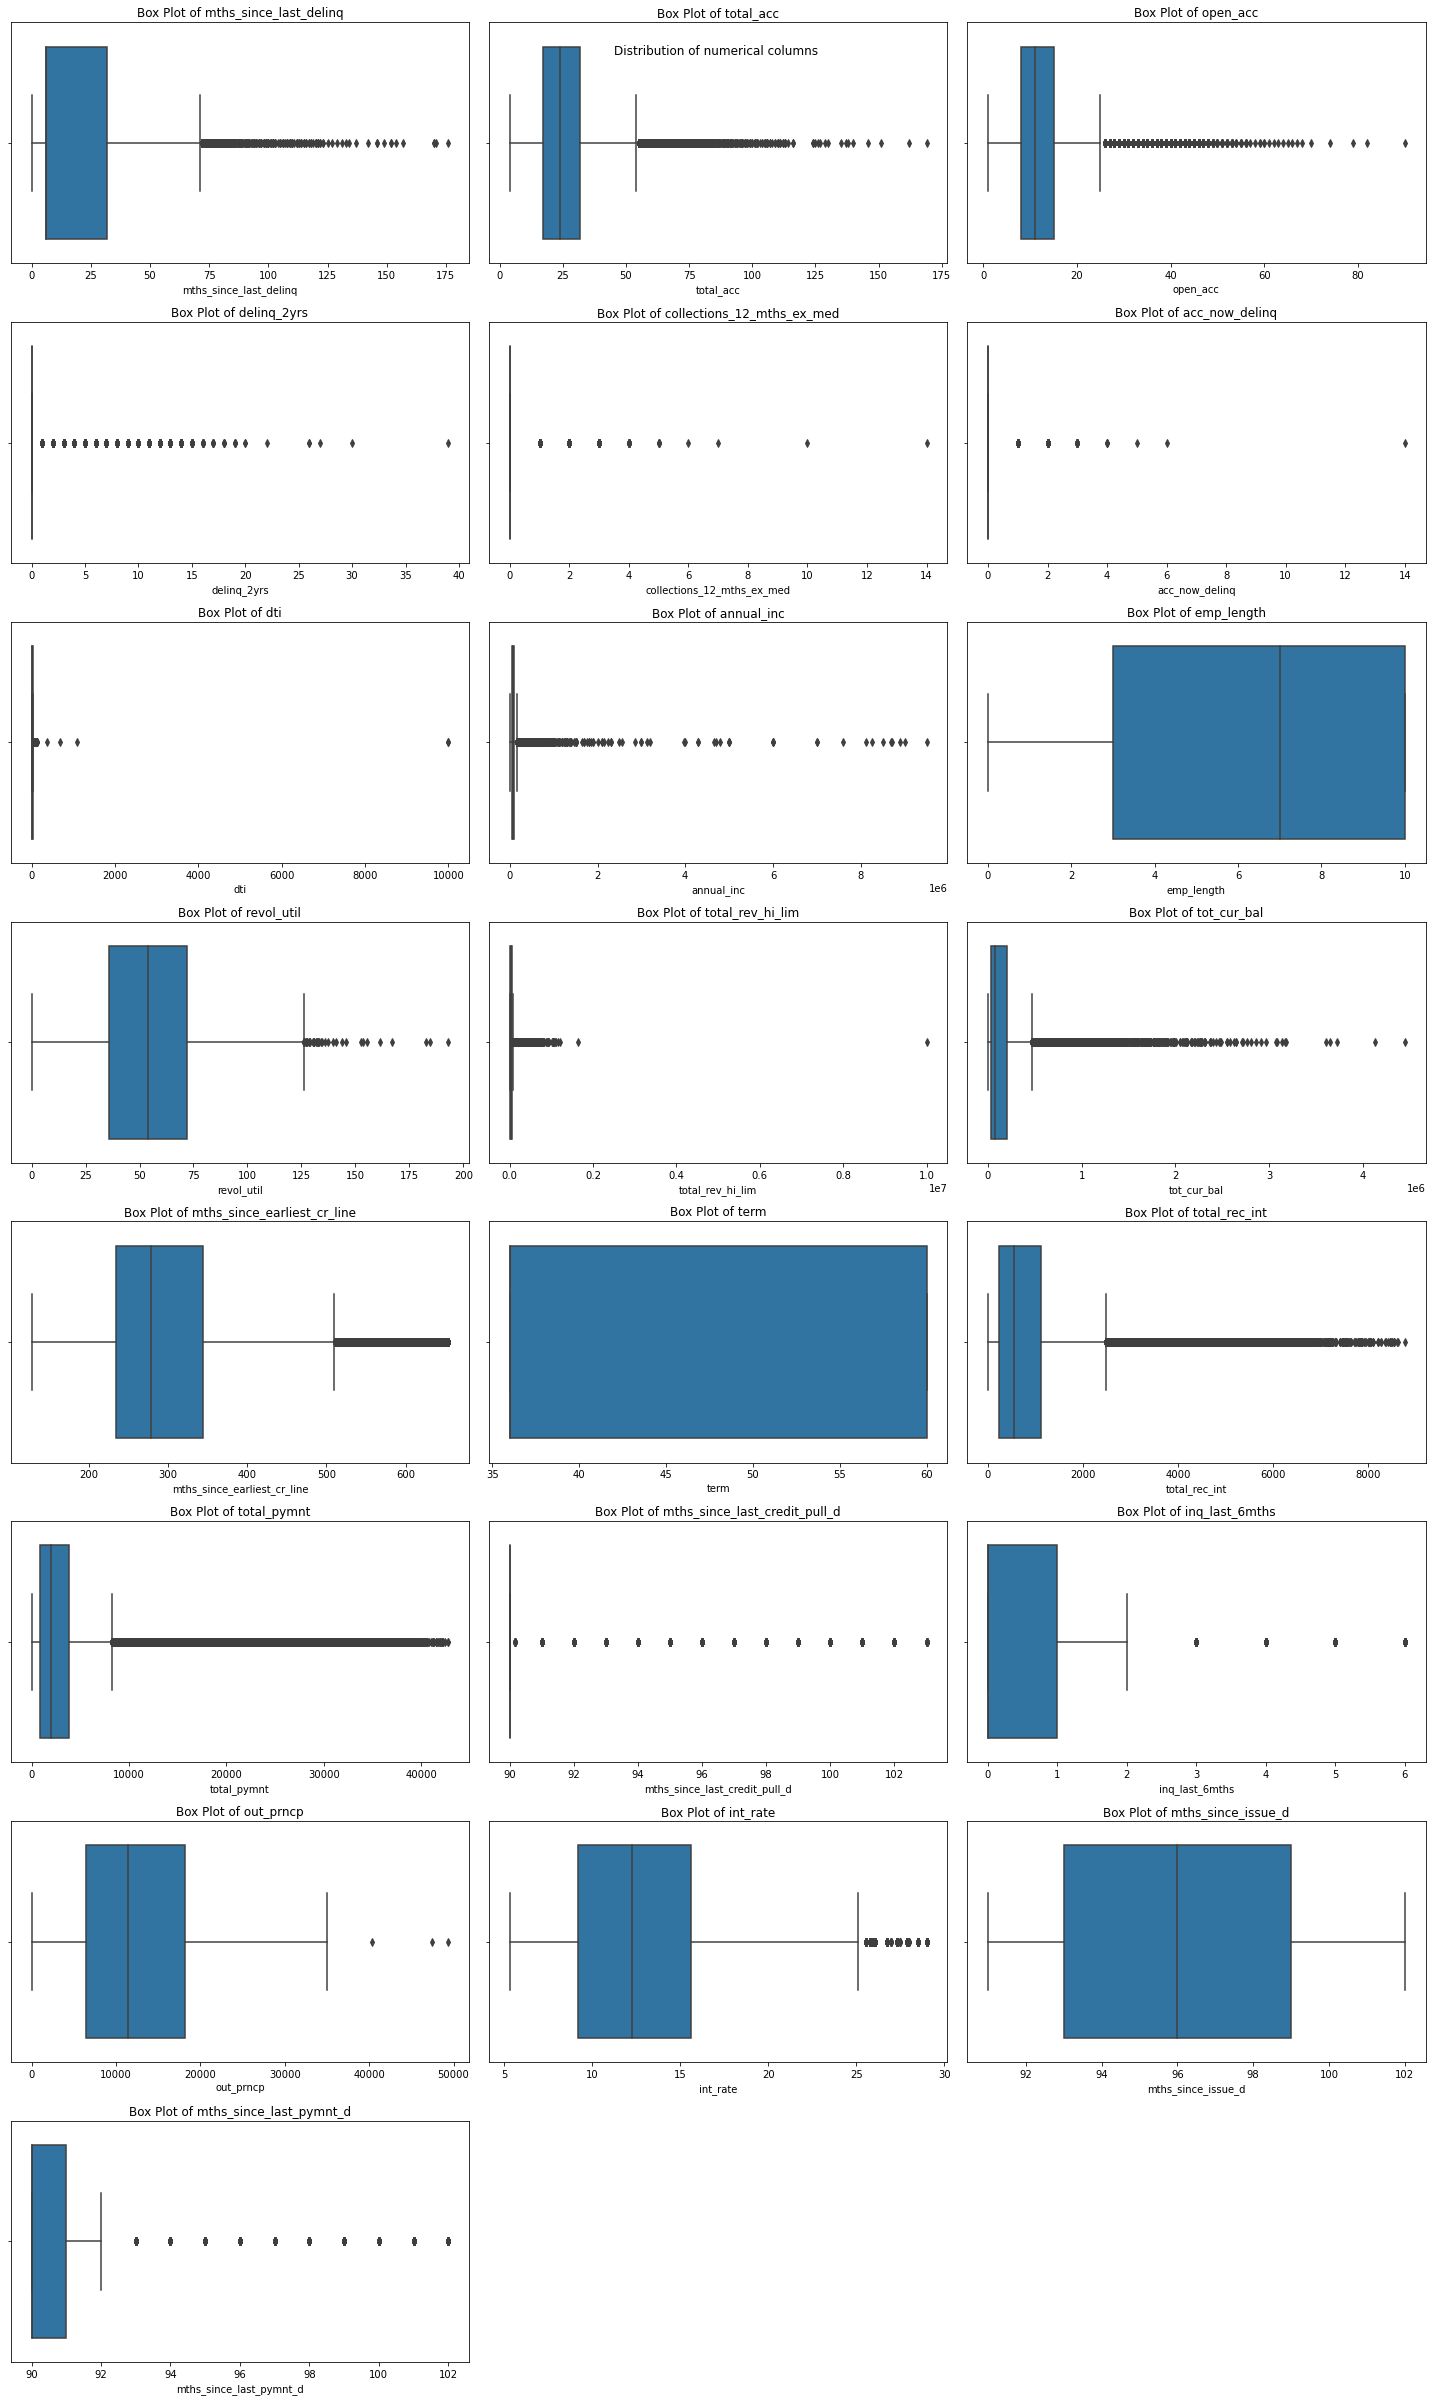

In [84]:
#Box Plot Creation 
plt.figure(figsize=(20, 50))
for i in range(len(num_col)):
    plt.subplot(12, 3, i + 1)
    sns.boxplot(data=num, x=num_col[i])
    plt.title(f'Box Plot of {num_col[i]}')

plt.suptitle('Distribution of numerical columns')
plt.tight_layout()

In [85]:
num['mths_since_last_delinq'].quantile(0.75)

32.0

In [2]:
## Using Inter Quartile range find Upper and Lower limit outside which outlier will need treatment

In [3]:
# Value below Lower range will be replaced by Lower IQR and above Upper will be replaced by Upper IQR

In [86]:
for col in num_col:
    q75 = num[col].quantile(0.75)
    q25 = num[col].quantile(0.25)
    upper = q75 + 1.5 * (q75-q25)
    lower = q25 - 1.5 * (q75-q25)
    num[col] = np.where(num[col] > upper, upper, num[col])
    num[col] = np.where(num[col] < lower, lower, num[col])

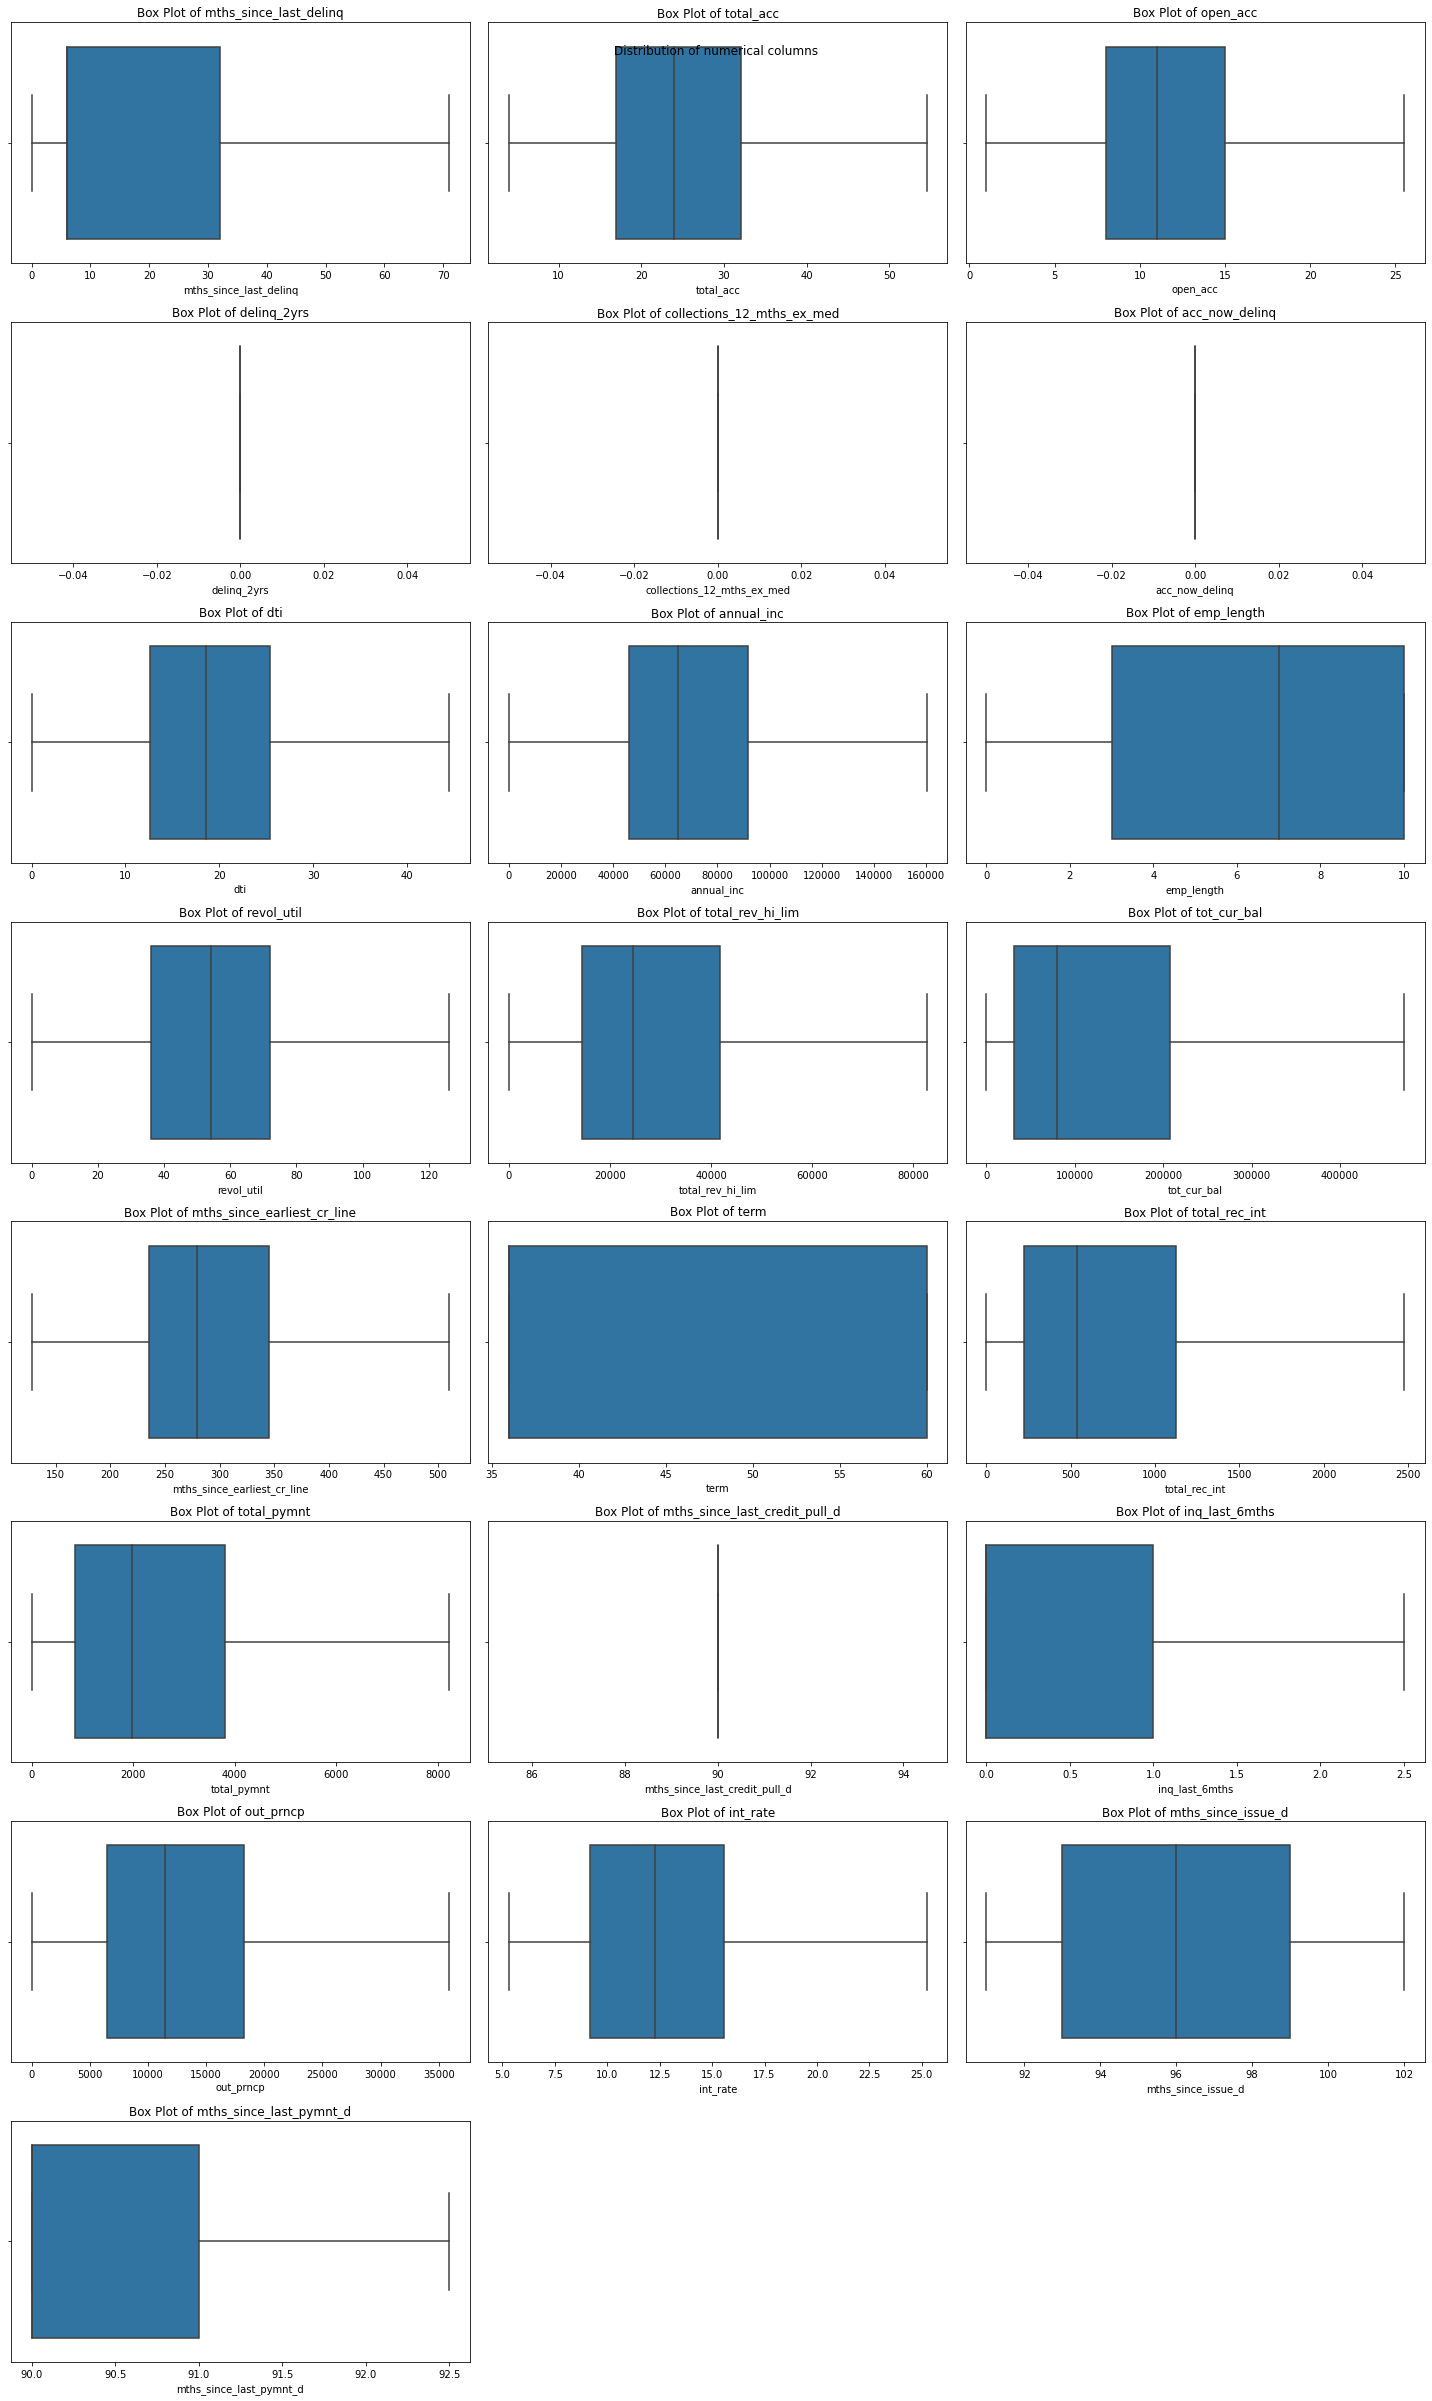

In [87]:
#Box plot after IQR treatment
plt.figure(figsize=(20, 50))
for i in range(len(num_col)):
    plt.subplot(12, 3, i + 1)
    sns.boxplot(data=num, x=num_col[i])
    plt.title(f'Box Plot of {num_col[i]}')

plt.suptitle('Distribution of numerical columns')
plt.tight_layout()

In [88]:
num.shape

(421094, 22)

## Weight Of Evidence & Information value for Categorical variable

In [89]:
def woe_discrete(df1,variable_name,df_target):
    df1 = pd.concat([df1[variable_name],df_target],axis=1)
    df1 = pd.concat([df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].count()
                     ,df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].mean()],axis=1)
    df1 = df1.iloc[:,[0,1,3]]
    df1.columns = [df1.columns.values[0],'n_obs','prop_good']
    
    df1['prop_n_obs'] = df1['n_obs']/df1['n_obs'].sum()
    df1['n_good']= df1['prop_good'] * df1['n_obs']
    df1['n_bad']= df1['n_obs']-df1['n_good'] #(1-df1['prop_good'])*df1['n_obs']

    df1['prop_n_good'] = df1['n_good']/df1['n_good'].sum()
    df1['prop_n_bad'] = df1['n_bad']/df1['n_bad'].sum()

    df1['WoE'] = np.log(df1['prop_n_good']/df1['prop_n_bad'])

    df1 = df1.sort_values('WoE')
    df1 = df1.reset_index(drop=True)

    df1['diff_prop_good'] = df1['prop_good'].diff().abs()
    df1['diff_WoE'] = df1['WoE'].diff().abs()

    df1['IV'] = ((df1['prop_n_good']-df1['prop_n_bad'])*df1['WoE'])    
    #df1['IV'] = df1['IV'].sum()
    return df1

In [90]:
def plot_woe(df,rotation_x_axis=0):
    x = np.array(df.iloc[:,0].apply(str))
    y = df['WoE']
    
    plt.figure(figsize=(18,6)) # Sets the graph size to width 18 x height 6.
    
    # Plots the datapoints with coordiantes variable x on the x-axis and variable y on the y-axis.
    plt.plot(x,y,marker='o',linestyle='--',color='g')
    plt.title("Weight of evidence by "+df.columns[0])
    plt.xlabel(df.columns[0]+" categories")  # Names the x-axis with the name of the column with index 0.
    plt.ylabel("WoE") # Names the y-axis 'Weight of Evidence'.
    
    # Rotates the labels of the x-axis a predefined number of degrees.
    plt.xticks(rotation = rotation_x_axis)    
    
    plt.show()

In [91]:
def woe_categorical(df1, col, y):
    df1 = pd.concat([df1[col], y], axis = 1)
    df1 = pd.concat([df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].count()
                     ,df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].mean()],axis=1)
    df1 = df1.iloc[:,[0,1,3]]
    df1.columns = [df1.columns.values[0],'n_obs','prop_good']
    
    df1['prop_n_obs'] = df1['n_obs']/df1['n_obs'].sum()
    df1['n_good']= df1['prop_good'] * df1['n_obs']
    df1['n_bad']= df1['n_obs']-df1['n_good']
    
    df1['prop_n_good'] = df1['n_good']/df1['n_good'].sum()
    df1['prop_n_bad'] = df1['n_bad']/df1['n_bad'].sum()
    
    df1['WoE'] = np.log(df1['prop_n_good']/df1['prop_n_bad'])
    
    df1 = df1.sort_values('WoE')
    df1 = df1.reset_index(drop=True)
    
    df1['diff_prop_good'] = df1['prop_good'].diff().abs()
    df1['diff_WoE'] = df1['WoE'].diff().abs()

    df1['IV'] = ((df1['prop_n_good']-df1['prop_n_bad'])*df1['WoE'])    
    #df1['IV'] = df1['IV'].sum()
    return df1

In [92]:
sns.set()

In [93]:
df_temp = woe_categorical(cat, 'grade', y)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2167,0.904015,0.005146,1959.0,208.0,0.004741,0.026493,-1.720744,NaN,NaN,0.037431
1,F,9817,0.930529,0.023313,9135.0,682.0,0.022106,0.086868,-1.368556,0.026514,0.352187,0.088631
2,E,34948,0.956936,0.082993,33443.0,1505.0,0.080928,0.191695,-0.862345,0.026407,0.506211,0.095520
3,D,62654,0.967488,0.148789,60617.0,2037.0,0.146686,0.259457,-0.570298,0.010552,0.292048,0.064313
4,C,120567,0.982541,0.286318,118462.0,2105.0,0.286664,0.268119,0.066882,0.015053,0.637180,0.001240
5,B,117606,0.991097,0.279287,116559.0,1047.0,0.282059,0.133359,0.749074,0.008557,0.682192,0.111388
6,A,73335,0.996359,0.174154,73068.0,267.0,0.176816,0.034008,1.648502,0.005262,0.899428,0.235419


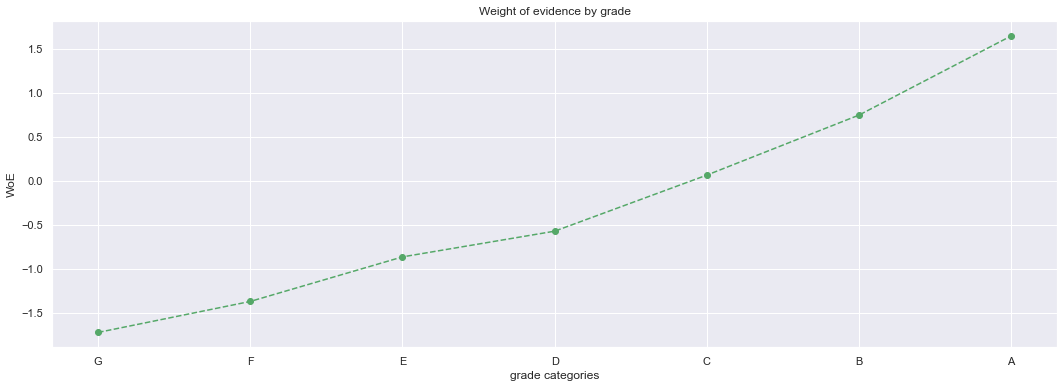

In [94]:
plot_woe(df_temp)

In [95]:
grade_dict = {}
for i in df_temp.index:
    grade_dict[df_temp.iloc[i, 0]] = df_temp.loc[i, 'WoE']
    print(df_temp.iloc[i, 0],df_temp.loc[i, 'WoE'])

G -1.720743547199356
F -1.3685560744739336
E -0.8623452865322196
D -0.5702976408998103
C 0.06688188146552099
B 0.749073765246691
A 1.6485022495537462


In [96]:
cat.columns

Index(['grade', 'home_ownership', 'verification_status', 'purpose',
       'initial_list_status'],
      dtype='object')

  grade   n_obs  prop_good  prop_n_obs    n_good   n_bad  prop_n_good  \
0     G    2167   0.904015    0.005146    1959.0   208.0     0.004741   
1     F    9817   0.930529    0.023313    9135.0   682.0     0.022106   
2     E   34948   0.956936    0.082993   33443.0  1505.0     0.080928   
3     D   62654   0.967488    0.148789   60617.0  2037.0     0.146686   
4     C  120567   0.982541    0.286318  118462.0  2105.0     0.286664   
5     B  117606   0.991097    0.279287  116559.0  1047.0     0.282059   
6     A   73335   0.996359    0.174154   73068.0   267.0     0.176816   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.026493 -1.720744             NaN       NaN  0.037431  
1    0.086868 -1.368556        0.026514  0.352187  0.088631  
2    0.191695 -0.862345        0.026407  0.506211  0.095520  
3    0.259457 -0.570298        0.010552  0.292048  0.064313  
4    0.268119  0.066882        0.015053  0.637180  0.001240  
5    0.133359  0.749074        0.008557  0.

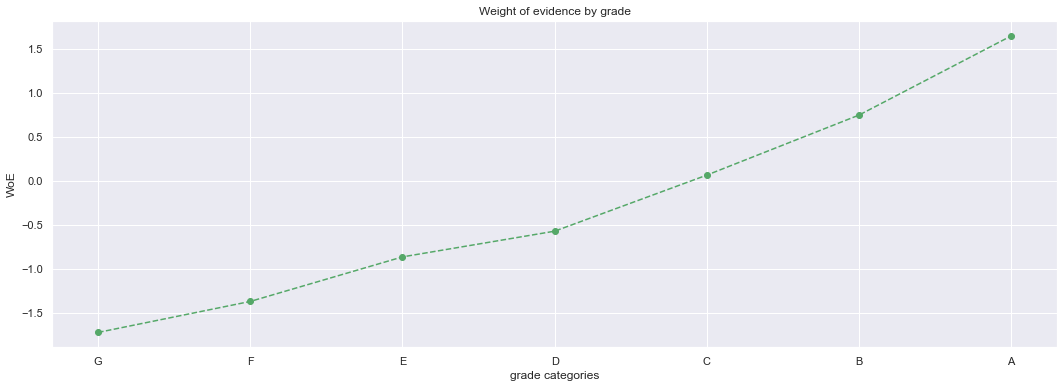

  home_ownership   n_obs  prop_good  prop_n_obs    n_good   n_bad  \
0           RENT  167644   0.976933    0.398115  163777.0  3867.0   
1            OWN   45766   0.980750    0.108684   44885.0   881.0   
2       MORTGAGE  207682   0.985059    0.493196  204579.0  3103.0   
3            ANY       2   1.000000    0.000005       2.0     0.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.396321    0.492549 -0.217368             NaN       NaN  0.020917  
1     0.108616    0.112215 -0.032594        0.003817  0.184775  0.000117  
2     0.495057    0.395236  0.225190        0.004309  0.257784  0.022479  
3     0.000005    0.000000       inf        0.014941       inf       inf  


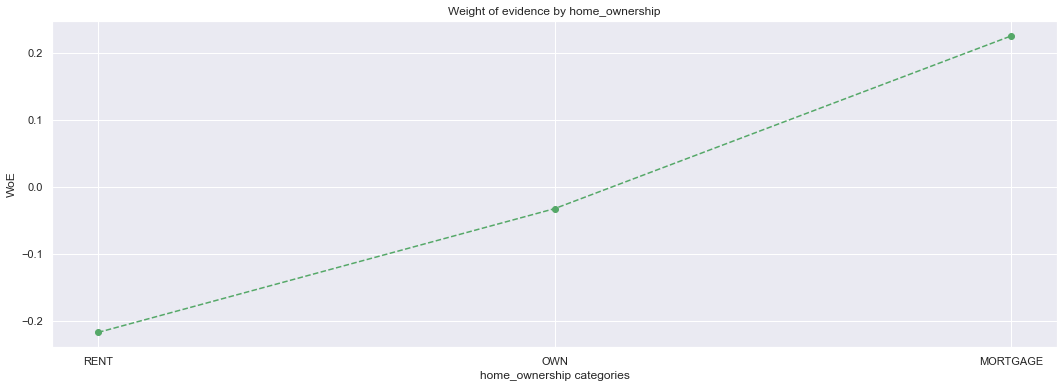

  verification_status   n_obs  prop_good  prop_n_obs    n_good   n_bad  \
0            Verified  123016   0.976532    0.292134  120129.0  2887.0   
1     Source Verified  179565   0.981110    0.426425  176173.0  3392.0   
2        Not Verified  118513   0.986736    0.281441  116941.0  1572.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.290698    0.367724 -0.235047             NaN       NaN  0.018105  
1     0.426318    0.432047 -0.013348        0.004578  0.221698  0.000076  
2     0.282984    0.200229  0.345926        0.005626  0.359274  0.028627  


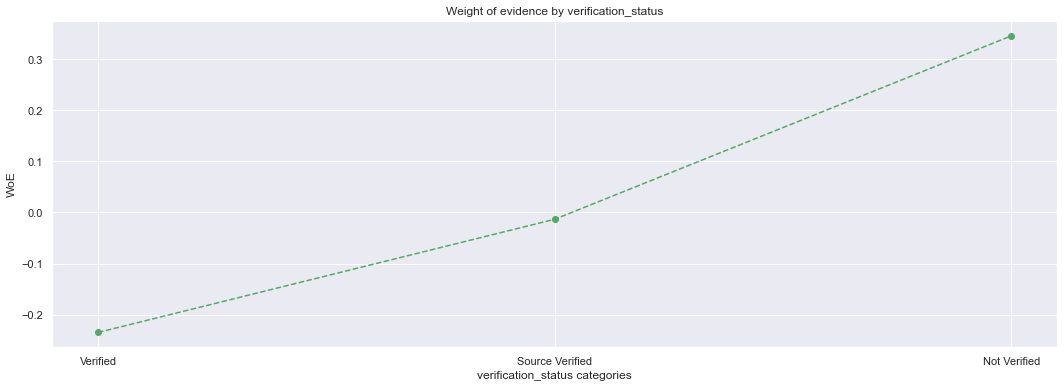

               purpose   n_obs  prop_good  prop_n_obs    n_good   n_bad  \
0              wedding       4   0.750000    0.000009       3.0     1.0   
1     renewable_energy     224   0.955357    0.000532     214.0    10.0   
2       small_business    3364   0.958680    0.007989    3225.0   139.0   
3               moving    2420   0.965289    0.005747    2336.0    84.0   
4                house    1438   0.967316    0.003415    1391.0    47.0   
5              medical    3938   0.970797    0.009352    3823.0   115.0   
6       major_purchase    7449   0.975970    0.017690    7270.0   179.0   
7                other   19204   0.976672    0.045605   18756.0   448.0   
8             vacation    2249   0.977768    0.005341    2199.0    50.0   
9   debt_consolidation  250020   0.979878    0.593739  244989.0  5031.0   
10    home_improvement   25292   0.982445    0.060063   24848.0   444.0   
11                 car    3466   0.982689    0.008231    3406.0    60.0   
12         credit_card  1

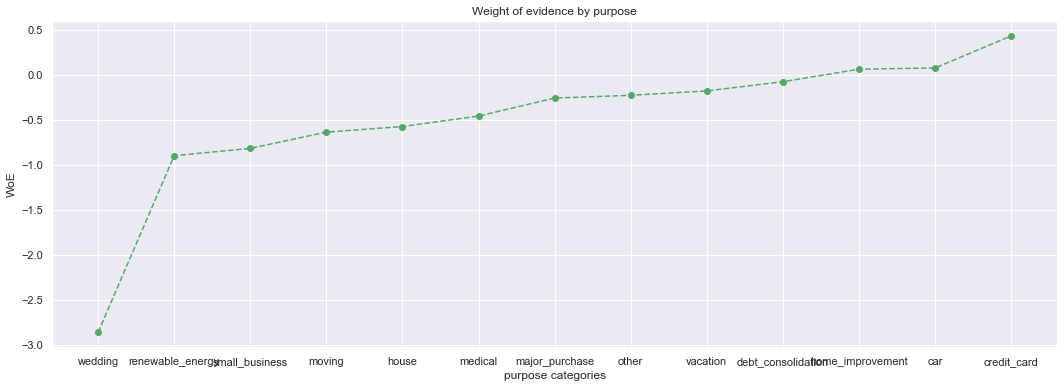

  initial_list_status   n_obs  prop_good  prop_n_obs    n_good   n_bad  \
0                   f  153843   0.972550    0.365341  149620.0  4223.0   
1                   w  267251   0.986425    0.634659  263623.0  3628.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.362063    0.537893 -0.395842             NaN       NaN  0.069601  
1     0.637937    0.462107  0.322444        0.013875  0.718286  0.056695  


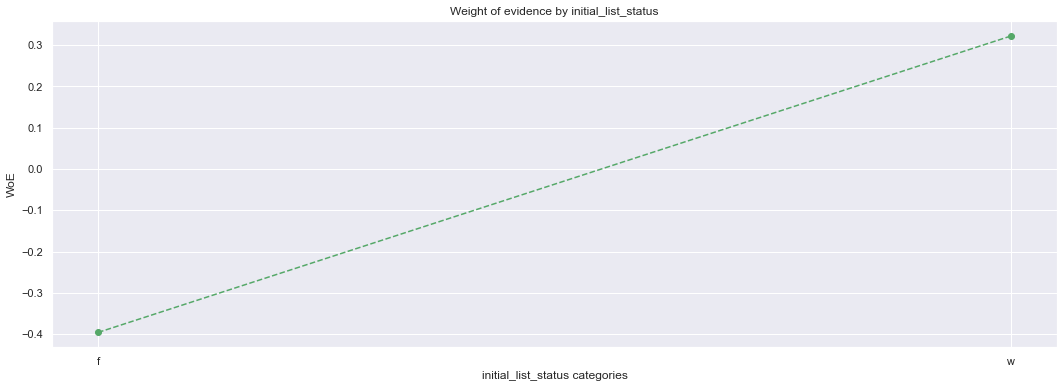

In [97]:
for col in cat.columns:
    df_temp = woe_categorical(cat, col, y)
    print(df_temp)
    plot_woe(df_temp)
    dict = {}
    for i in df_temp.index:
        dict[df_temp.iloc[i, 0]] = df_temp.loc[i, 'WoE']
    cat[col+'_'] = cat[col].map(dict)
    cat[col+'_'] = np.where(cat[col+'_'].isin([np.inf, -np.inf]), cat[col+'_'].min(), cat[col+'_'])
    cat.drop(col, axis = 1, inplace = True)

In [98]:
cat

,grade_,home_ownership_,verification_status_,purpose_,initial_list_status_
0,0.066882,-0.032594,-0.013348,-0.077800,0.322444
1,0.066882,0.225190,-0.013348,-0.077800,0.322444
2,0.749074,0.225190,-0.013348,-0.077800,-0.395842
3,0.749074,0.225190,-0.013348,0.432037,-0.395842
4,-0.862345,-0.217368,-0.235047,-0.077800,0.322444
...,...,...,...,...,...
421089,-0.862345,0.225190,-0.235047,-0.077800,-0.395842
421090,-0.570298,0.225190,-0.235047,-0.077800,-0.395842
421091,-1.368556,-0.217368,-0.235047,-0.077800,0.322444
421092,0.066882,-0.032594,-0.235047,0.432037,0.322444


In [99]:
num.columns

Index(['mths_since_last_delinq', 'total_acc', 'open_acc', 'delinq_2yrs',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'dti', 'annual_inc',
       'emp_length', 'revol_util', 'total_rev_hi_lim', 'tot_cur_bal',
       'mths_since_earliest_cr_line', 'term', 'total_rec_int', 'total_pymnt',
       'mths_since_last_credit_pull_d', 'inq_last_6mths', 'out_prncp',
       'int_rate', 'mths_since_issue_d', 'mths_since_last_pymnt_d'],
      dtype='object')

## WOE for COntinuous variable

In [100]:
def woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [101]:
num_cat_col = []
del_num_col = []
for col in num.columns:
    #print(col, num[col].nunique())
    #print(col)
    if num[col].nunique() == 1:
        num.drop(col, axis = 1, inplace = True)
        del_num_col.append(col)
    elif num[col].nunique() <= 5:
        num_cat_col.append(col)

In [102]:
num_cat_col, del_num_col

(['term', 'inq_last_6mths', 'mths_since_last_pymnt_d'],
 ['delinq_2yrs',
  'collections_12_mths_ex_med',
  'acc_now_delinq',
  'mths_since_last_credit_pull_d'])

   term   n_obs  prop_good  prop_n_obs    n_good   n_bad  prop_n_good  \
0  60.0  137922   0.976885    0.327533  134734.0  3188.0     0.326041   
1  36.0  283172   0.983533    0.672467  278509.0  4663.0     0.673959   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.406063 -0.219486             NaN       NaN  0.017564  
1    0.593937  0.126396        0.006647  0.345883  0.010115  


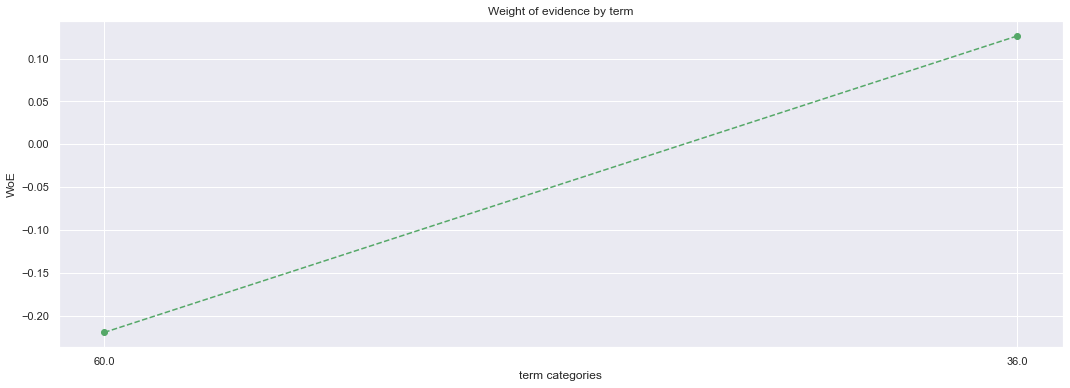

   inq_last_6mths   n_obs  prop_good  prop_n_obs    n_good   n_bad  \
0             2.5   17049   0.964397    0.040487   16442.0   607.0   
1             2.0   36292   0.973438    0.086185   35328.0   964.0   
2             1.0  111346   0.978571    0.264421  108960.0  2386.0   
3             0.0  256407   0.984813    0.608907  252513.0  3894.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.039788    0.077315 -0.664329             NaN       NaN  0.024930  
1     0.085490    0.122787 -0.362055        0.009041  0.302274  0.013504  
2     0.263671    0.303910 -0.142032        0.005134  0.220023  0.005715  
3     0.611052    0.495988  0.208631        0.006242  0.350663  0.024006  


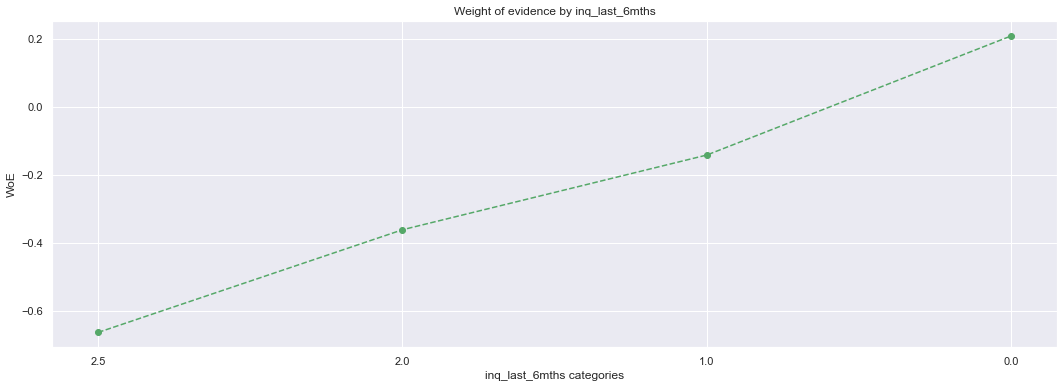

   mths_since_last_pymnt_d   n_obs  prop_good  prop_n_obs    n_good   n_bad  \
0                92.000000    4664   0.694897    0.011076    3241.0  1423.0   
1                92.500000   19756   0.734511    0.046916   14511.0  5245.0   
2                90.507321   17283   0.983105    0.041043   16991.0   292.0   
3                91.000000   88861   0.994204    0.211024   88346.0   515.0   
4                90.000000  290530   0.998706    0.689941  290154.0   376.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.007843    0.181251 -3.140280             NaN       NaN  0.544550  
1     0.035115    0.668068 -2.945763        0.039614  0.194517  1.864529  
2     0.041116    0.037193  0.100290        0.248594  3.046054  0.000393  
3     0.213787    0.065597  1.181454        0.011100  1.081164  0.175080  
4     0.702139    0.047892  2.685183        0.004501  1.503729  1.756773  


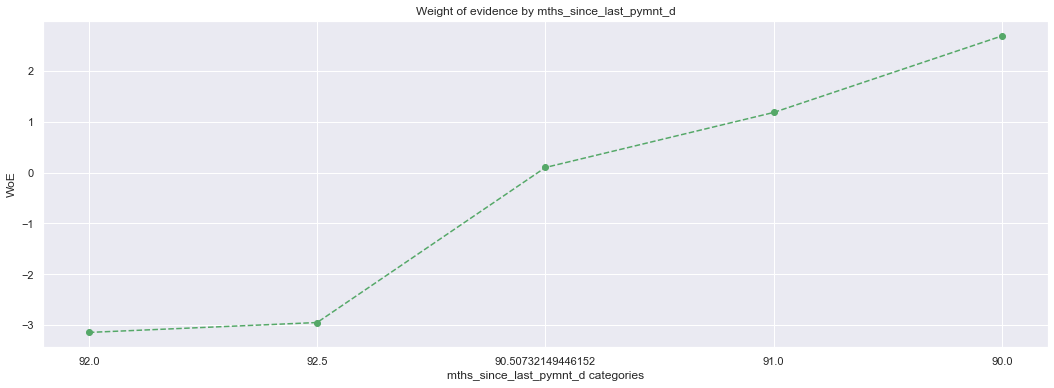

In [103]:
num1 = num.copy()

for col in num_cat_col:
    df_temp = woe_categorical(num, col, y)
    print(df_temp)
    plot_woe(df_temp)
    dict = {}
    for i in df_temp.index:
        dict[df_temp.iloc[i, 0]] = df_temp.loc[i, 'WoE']
    
    num1[col+'_'] = num1[col].map(dict)
    num1[col+'_'] = np.where(num1[col+'_'].isin([np.inf, -np.inf]), num1[col+'_'].min(), num1[col+'_'])
    num1.drop(col, axis = 1, inplace = True)
    num.drop(col, axis = 1, inplace = True)

In [104]:
num.head()

,mths_since_last_delinq,total_acc,open_acc,dti,annual_inc,emp_length,revol_util,total_rev_hi_lim,tot_cur_bal,mths_since_earliest_cr_line,total_rec_int,total_pymnt,out_prncp,int_rate,mths_since_issue_d
0,6.0,42.0,25.0,20.72,65000.0,1.0,77.0,41000.0,52303.0,274.0,0.00,0.00000,0.0,12.29,94.0
1,36.0,41.0,13.0,24.57,40000.0,7.0,38.8,13100.0,175731.0,250.0,100.81,8226.54625,0.0,12.69,94.0
2,6.0,36.0,18.0,32.41,32000.0,6.0,74.0,16300.0,202012.0,209.0,54.40,221.96000,0.0,9.99,94.0
3,6.0,41.0,18.0,30.98,48000.0,10.0,66.0,34750.0,108235.0,285.0,79.37,315.13000,0.0,10.99,94.0
4,69.0,26.0,9.0,32.54,32376.0,10.0,29.6,14100.0,45492.0,284.0,137.88,333.66000,0.0,19.99,94.0


In [105]:
num1.head()

,mths_since_last_delinq,total_acc,open_acc,dti,annual_inc,emp_length,revol_util,total_rev_hi_lim,tot_cur_bal,mths_since_earliest_cr_line,total_rec_int,total_pymnt,out_prncp,int_rate,mths_since_issue_d,term_,inq_last_6mths_,mths_since_last_pymnt_d_
0,6.0,42.0,25.0,20.72,65000.0,1.0,77.0,41000.0,52303.0,274.0,0.00,0.00000,0.0,12.29,94.0,0.126396,-0.142032,0.100290
1,36.0,41.0,13.0,24.57,40000.0,7.0,38.8,13100.0,175731.0,250.0,100.81,8226.54625,0.0,12.69,94.0,0.126396,0.208631,-2.945763
2,6.0,36.0,18.0,32.41,32000.0,6.0,74.0,16300.0,202012.0,209.0,54.40,221.96000,0.0,9.99,94.0,0.126396,-0.142032,-2.945763
3,6.0,41.0,18.0,30.98,48000.0,10.0,66.0,34750.0,108235.0,285.0,79.37,315.13000,0.0,10.99,94.0,0.126396,-0.362055,-2.945763
4,69.0,26.0,9.0,32.54,32376.0,10.0,29.6,14100.0,45492.0,284.0,137.88,333.66000,0.0,19.99,94.0,0.126396,-0.664329,-2.945763


In [106]:
num.shape, num1.shape

((421094, 15), (421094, 18))

## Replacing all variable with WOE based on WOE, calculated as above

   mths_since_last_delinq_factor   n_obs  prop_good  prop_n_obs    n_good  \
0                (-0.071, 4.733]   10609   0.974738    0.025194   10341.0   
1                 (4.733, 9.467]  224672   0.981106    0.533544  220427.0   
2                  (9.467, 14.2]   20194   0.980192    0.047956   19794.0   
3                 (14.2, 18.933]   15027   0.977041    0.035686   14682.0   
4               (18.933, 23.667]   17745   0.984390    0.042140   17468.0   
5                 (23.667, 28.4]   17208   0.981811    0.040865   16895.0   
6                 (28.4, 33.133]   16215   0.984891    0.038507   15970.0   
7               (33.133, 37.867]   12222   0.983718    0.029024   12023.0   
8                 (37.867, 42.6]   13907   0.980801    0.033026   13640.0   
9                 (42.6, 47.333]   13057   0.983610    0.031007   12843.0   
10              (47.333, 52.067]    9943   0.981293    0.023612    9757.0   
11                (52.067, 56.8]    7492   0.979979    0.017792    7342.0   

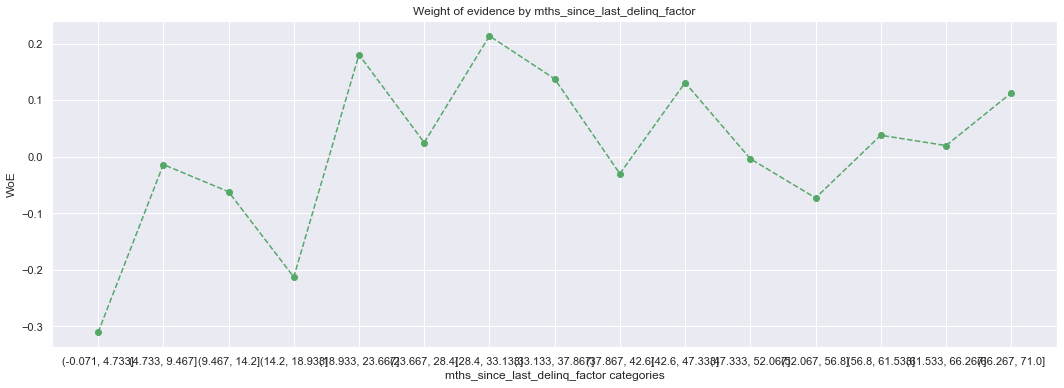

    total_acc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0      (3.95, 7.367]  11333   0.976970    0.026913  11072.0   261.0   
1    (7.367, 10.733]  21005   0.979767    0.049882  20580.0   425.0   
2     (10.733, 14.1]  43773   0.979759    0.103951  42887.0   886.0   
3     (14.1, 17.467]  40853   0.980564    0.097016  40059.0   794.0   
4   (17.467, 20.833]  44528   0.981742    0.105744  43715.0   813.0   
5     (20.833, 24.2]  59401   0.981515    0.141064  58303.0  1098.0   
6     (24.2, 27.567]  40934   0.981238    0.097209  40166.0   768.0   
7   (27.567, 30.933]  35493   0.982363    0.084288  34867.0   626.0   
8     (30.933, 34.3]  38067   0.982452    0.090400  37399.0   668.0   
9     (34.3, 37.667]  21936   0.982677    0.052093  21556.0   380.0   
10  (37.667, 41.033]  21619   0.983117    0.051340  21254.0   365.0   
11    (41.033, 44.4]  11712   0.982155    0.027813  11503.0   209.0   
12    (44.4, 47.767]   8787   0.980995    0.020867   8620.0   167.0   
13  (4

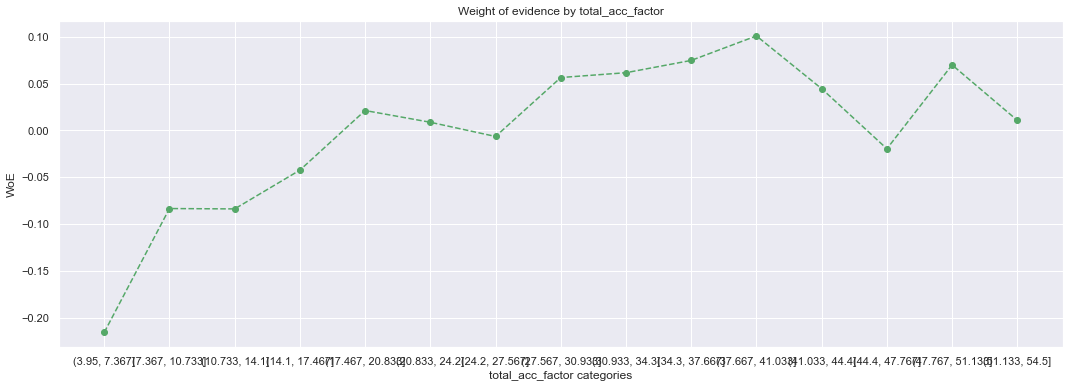

     open_acc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0     (0.976, 2.633]   1076   0.973978    0.002555   1048.0    28.0   
1     (2.633, 4.267]  14898   0.980467    0.035379  14607.0   291.0   
2       (4.267, 5.9]  18222   0.980738    0.043273  17871.0   351.0   
3       (5.9, 7.533]  55411   0.980924    0.131588  54354.0  1057.0   
4     (7.533, 9.167]  70951   0.981353    0.168492  69628.0  1323.0   
5      (9.167, 10.8]  35809   0.980647    0.085038  35116.0   693.0   
6     (10.8, 12.433]  63258   0.979797    0.150223  61980.0  1278.0   
7   (12.433, 14.067]  49920   0.982212    0.118548  49032.0   888.0   
8     (14.067, 15.7]  19544   0.981273    0.046412  19178.0   366.0   
9     (15.7, 17.333]  30371   0.982483    0.072124  29839.0   532.0   
10  (17.333, 18.967]  11462   0.982900    0.027220  11266.0   196.0   
11    (18.967, 20.6]  17434   0.982907    0.041402  17136.0   298.0   
12    (20.6, 22.233]  11530   0.982827    0.027381  11332.0   198.0   
13  (2

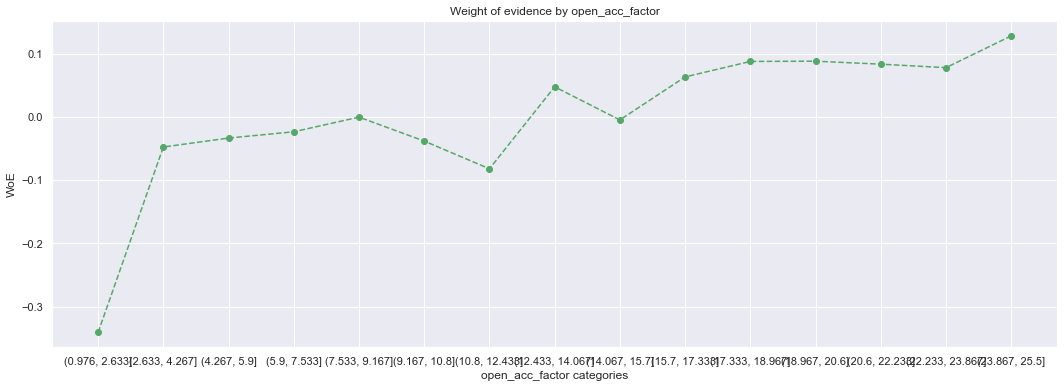

          dti_factor  n_obs  prop_good  prop_n_obs   n_good  n_bad  \
0   (-0.0445, 2.964]   6173   0.981208    0.014659   6057.0  116.0   
1     (2.964, 5.929]  16966   0.985736    0.040290  16724.0  242.0   
2     (5.929, 8.893]  29281   0.986066    0.069536  28873.0  408.0   
3    (8.893, 11.857]  41209   0.985222    0.097862  40600.0  609.0   
4   (11.857, 14.822]  49854   0.984856    0.118392  49099.0  755.0   
5   (14.822, 17.786]  52671   0.982989    0.125081  51775.0  896.0   
6    (17.786, 20.75]  51362   0.983315    0.121973  50505.0  857.0   
7    (20.75, 23.715]  45843   0.980695    0.108866  44958.0  885.0   
8   (23.715, 26.679]  39305   0.979545    0.093340  38501.0  804.0   
9   (26.679, 29.643]  32034   0.976587    0.076073  31284.0  750.0   
10  (29.643, 32.608]  24108   0.975112    0.057251  23508.0  600.0   
11  (32.608, 35.572]  17744   0.972667    0.042138  17259.0  485.0   
12  (35.572, 38.536]  10700   0.970467    0.025410  10384.0  316.0   
13  (38.536, 41.501]

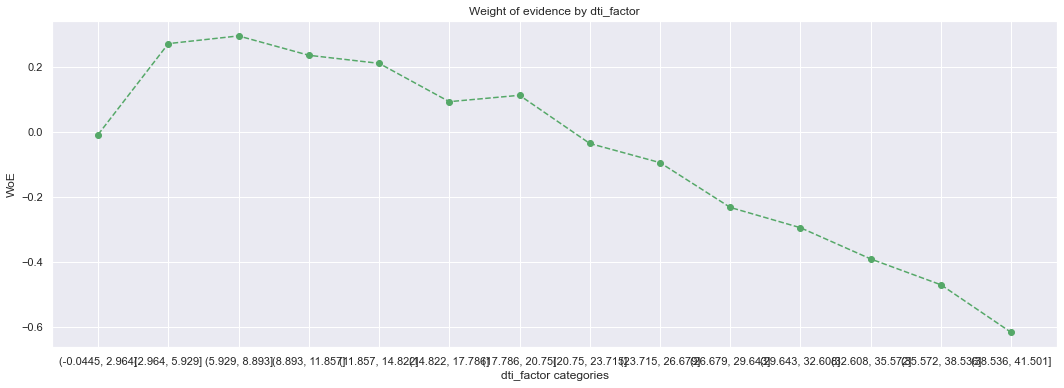

          annual_inc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0     (-160.228, 10681.875]    394   0.974619    0.000936    384.0    10.0   
1     (10681.875, 21363.75]   6606   0.971238    0.015688   6416.0   190.0   
2     (21363.75, 32045.625]  27966   0.975327    0.066413  27276.0   690.0   
3      (32045.625, 42727.5]  49486   0.976741    0.117518  48335.0  1151.0   
4      (42727.5, 53409.375]  62431   0.980058    0.148259  61186.0  1245.0   
5     (53409.375, 64091.25]  56732   0.981104    0.134725  55660.0  1072.0   
6     (64091.25, 74773.125]  47733   0.982737    0.113355  46909.0   824.0   
7      (74773.125, 85455.0]  47600   0.982038    0.113039  46745.0   855.0   
8      (85455.0, 96136.875]  28694   0.984387    0.068142  28246.0   448.0   
9    (96136.875, 106818.75]  23011   0.984051    0.054646  22644.0   367.0   
10  (106818.75, 117500.625]  14938   0.987615    0.035474  14753.0   185.0   
11   (117500.625, 128182.5]  14563   0.983314    0.034584  14320

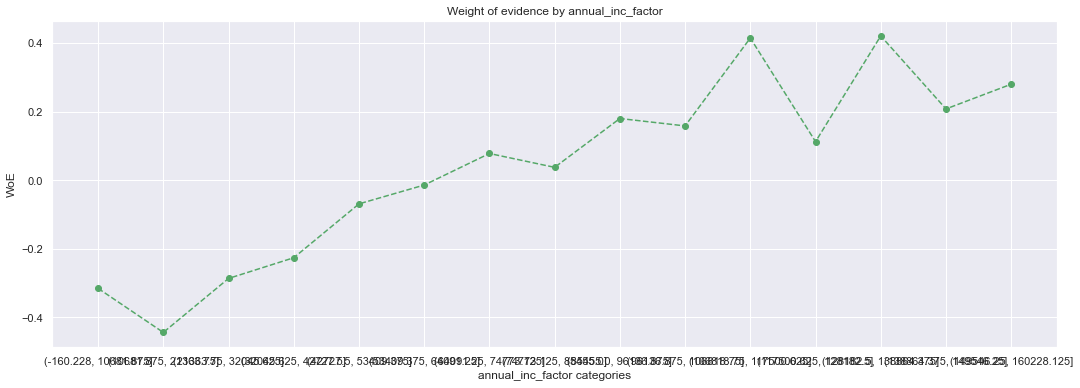

   emp_length_factor   n_obs  prop_good  prop_n_obs    n_good   n_bad  \
0     (-0.01, 0.667]   34340   0.978130    0.081549   33589.0   751.0   
1     (0.667, 1.333]   27473   0.977687    0.065242   26860.0   613.0   
2       (1.333, 2.0]   37497   0.980932    0.089047   36782.0   715.0   
3       (2.0, 2.667]       0        NaN    0.000000       NaN     NaN   
4     (2.667, 3.333]   33430   0.980975    0.079388   32794.0   636.0   
5       (3.333, 4.0]   24506   0.979678    0.058196   24008.0   498.0   
6       (4.0, 4.667]       0        NaN    0.000000       NaN     NaN   
7     (4.667, 5.333]   24930   0.980866    0.059203   24453.0   477.0   
8       (5.333, 6.0]   16838   0.978976    0.039986   16484.0   354.0   
9       (6.0, 6.667]       0        NaN    0.000000       NaN     NaN   
10    (6.667, 7.333]   18414   0.979201    0.043729   18031.0   383.0   
11      (7.333, 8.0]   21560   0.983905    0.051200   21213.0   347.0   
12      (8.0, 8.667]       0        NaN    0.000000

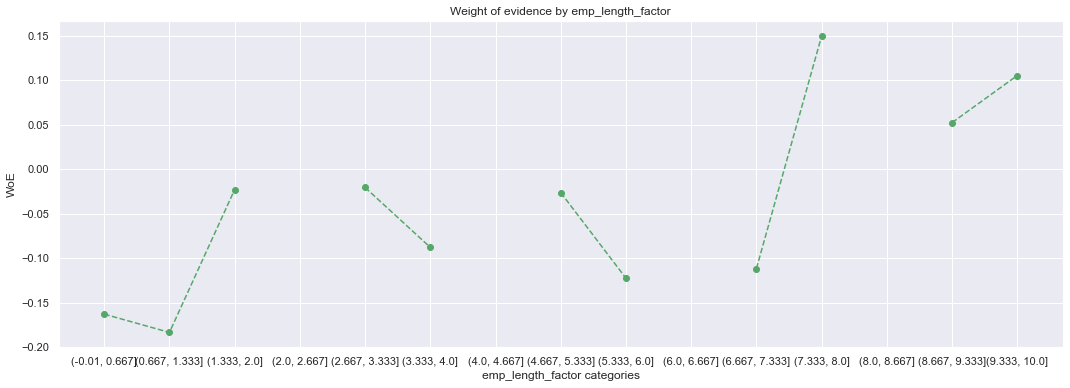

     revol_util_factor  n_obs  prop_good  prop_n_obs   n_good  n_bad  \
0      (-0.126, 8.407]  11574   0.979005    0.027486  11331.0  243.0   
1      (8.407, 16.813]  17153   0.983968    0.040734  16878.0  275.0   
2      (16.813, 25.22]  26866   0.983027    0.063800  26410.0  456.0   
3      (25.22, 33.627]  36980   0.983586    0.087819  36373.0  607.0   
4     (33.627, 42.033]  45635   0.983478    0.108372  44881.0  754.0   
5      (42.033, 50.44]  49498   0.983696    0.117546  48691.0  807.0   
6      (50.44, 58.847]  51476   0.982166    0.122243  50558.0  918.0   
7     (58.847, 67.253]  49491   0.981572    0.117530  48579.0  912.0   
8      (67.253, 75.66]  44945   0.980465    0.106734  44067.0  878.0   
9      (75.66, 84.067]  37488   0.979460    0.089025  36718.0  770.0   
10    (84.067, 92.473]  28766   0.977995    0.068313  28133.0  633.0   
11    (92.473, 100.88]  19805   0.972684    0.047032  19264.0  541.0   
12   (100.88, 109.287]   1240   0.960484    0.002945   1191.0   

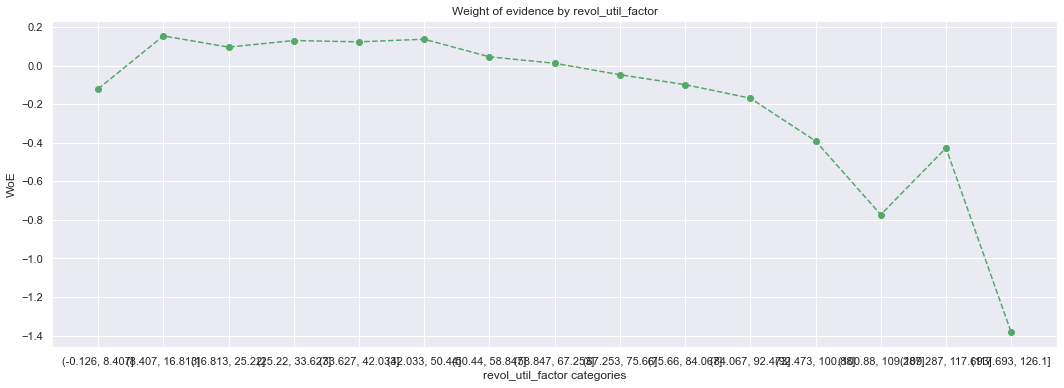

   total_rev_hi_lim_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0      (-82.586, 5505.708]  16957   0.972106    0.040269  16484.0   473.0   
1    (5505.708, 11011.417]  50871   0.974917    0.120807  49595.0  1276.0   
2   (11011.417, 16517.125]  62622   0.978458    0.148713  61273.0  1349.0   
3   (16517.125, 22022.833]  57274   0.980480    0.136012  56156.0  1118.0   
4   (22022.833, 27528.542]  47191   0.981734    0.112068  46329.0   862.0   
5    (27528.542, 33034.25]  37508   0.982537    0.089073  36853.0   655.0   
6    (33034.25, 38539.958]  29651   0.982935    0.070414  29145.0   506.0   
7   (38539.958, 44045.667]  23209   0.983282    0.055116  22821.0   388.0   
8   (44045.667, 49551.375]  18514   0.985849    0.043966  18252.0   262.0   
9   (49551.375, 55057.083]  14688   0.985498    0.034881  14475.0   213.0   
10  (55057.083, 60562.792]  11553   0.986930    0.027436  11402.0   151.0   
11    (60562.792, 66068.5]   8820   0.987528    0.020945   8710.0   110.0   

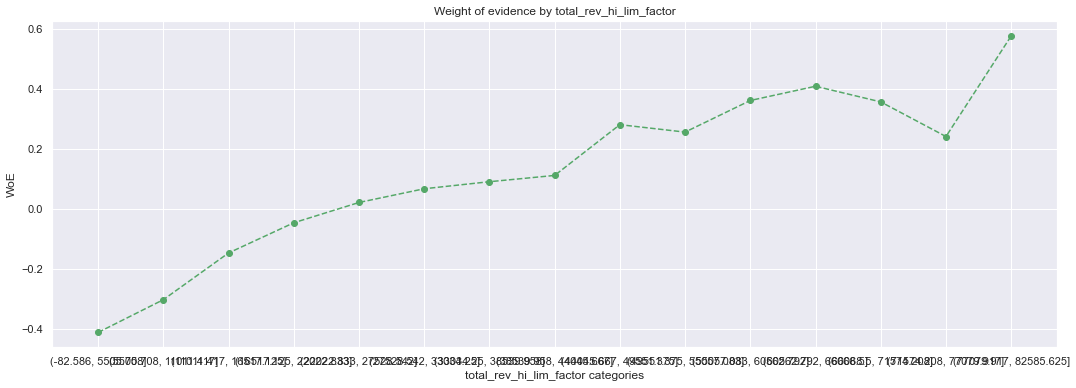

       tot_cur_bal_factor   n_obs  prop_good  prop_n_obs    n_good   n_bad  \
0     (-472.13, 31475.35]  106982   0.978996    0.254057  104735.0  2247.0   
1     (31475.35, 62950.7]   81269   0.977974    0.192995   79479.0  1790.0   
2     (62950.7, 94426.05]   37278   0.978298    0.088527   36469.0   809.0   
3    (94426.05, 125901.4]   26414   0.982206    0.062727   25944.0   470.0   
4   (125901.4, 157376.75]   25490   0.983170    0.060533   25061.0   429.0   
5   (157376.75, 188852.1]   24945   0.983684    0.059239   24538.0   407.0   
6   (188852.1, 220327.45]   22136   0.983872    0.052568   21779.0   357.0   
7   (220327.45, 251802.8]   18668   0.986126    0.044332   18409.0   259.0   
8   (251802.8, 283278.15]   15696   0.985474    0.037274   15468.0   228.0   
9   (283278.15, 314753.5]   12925   0.985068    0.030694   12732.0   193.0   
10  (314753.5, 346228.85]   10245   0.983699    0.024329   10078.0   167.0   
11  (346228.85, 377704.2]    8062   0.987348    0.019145    7960

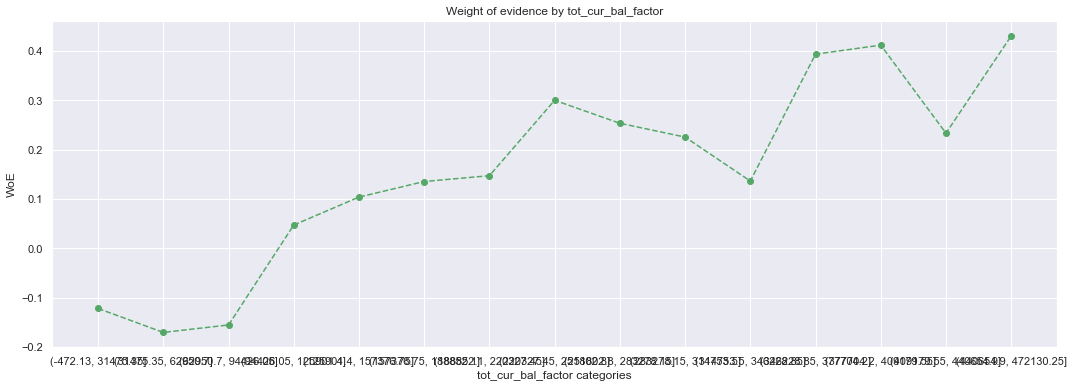

   mths_since_earliest_cr_line_factor  n_obs  prop_good  prop_n_obs   n_good  \
0                  (127.618, 153.467]   8658   0.975860    0.020561   8449.0   
1                  (153.467, 178.933]  12565   0.972304    0.029839  12217.0   
2                    (178.933, 204.4]  28246   0.976351    0.067078  27578.0   
3                    (204.4, 229.867]  45312   0.977291    0.107605  44283.0   
4                  (229.867, 255.333]  59826   0.979591    0.142073  58605.0   
5                    (255.333, 280.8]  58499   0.981538    0.138921  57419.0   
6                    (280.8, 306.267]  48485   0.982469    0.115141  47635.0   
7                  (306.267, 331.733]  36124   0.982920    0.085786  35507.0   
8                    (331.733, 357.2]  34019   0.984567    0.080787  33494.0   
9                    (357.2, 382.667]  20199   0.984752    0.047968  19891.0   
10                 (382.667, 408.133]  18032   0.985748    0.042822  17775.0   
11                   (408.133, 433.6]  1

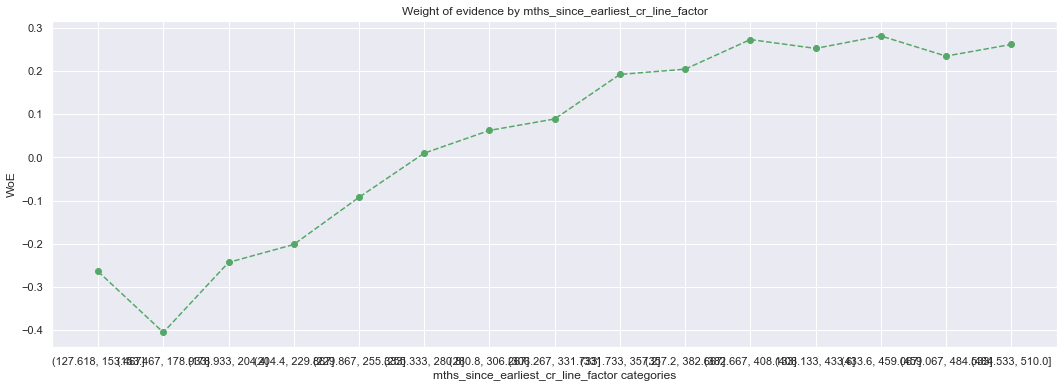

    total_rec_int_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0      (-2.476, 165.037]  79235   0.987707    0.188165  78261.0   974.0   
1     (165.037, 330.074]  67115   0.984325    0.159382  66063.0  1052.0   
2     (330.074, 495.111]  52976   0.982804    0.125806  52065.0   911.0   
3     (495.111, 660.149]  40596   0.981057    0.096406  39827.0   769.0   
4     (660.149, 825.186]  32254   0.979785    0.076596  31602.0   652.0   
5     (825.186, 990.223]  25849   0.977833    0.061385  25276.0   573.0   
6     (990.223, 1155.26]  21005   0.977005    0.049882  20522.0   483.0   
7    (1155.26, 1320.297]  17107   0.978722    0.040625  16743.0   364.0   
8   (1320.297, 1485.334]  14281   0.974932    0.033914  13923.0   358.0   
9   (1485.334, 1650.372]  11644   0.977413    0.027652  11381.0   263.0   
10  (1650.372, 1815.409]   9666   0.976102    0.022954   9435.0   231.0   
11  (1815.409, 1980.446]   8030   0.972354    0.019069   7808.0   222.0   
12  (1980.446, 2145.483] 

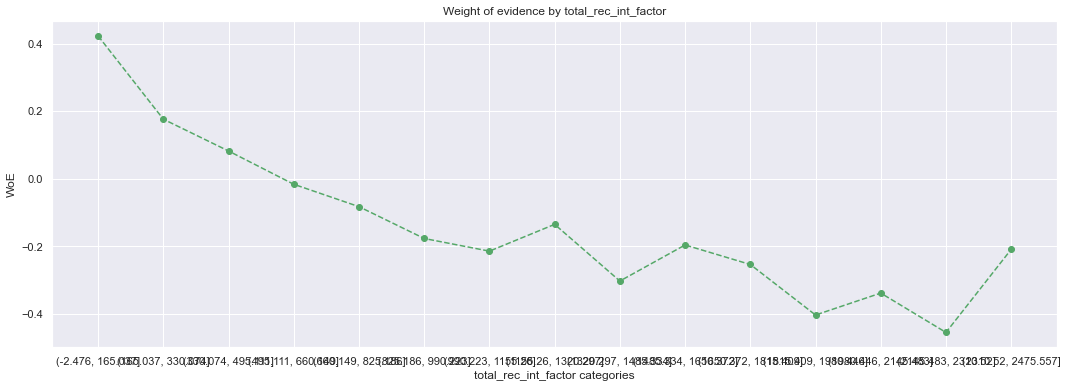

      total_pymnt_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0      (-8.227, 548.436]  69105   0.985196    0.164108  68082.0  1023.0   
1    (548.436, 1096.873]  62241   0.979001    0.147808  60934.0  1307.0   
2   (1096.873, 1645.309]  52131   0.977614    0.123799  50964.0  1167.0   
3   (1645.309, 2193.746]  43529   0.976475    0.103371  42505.0  1024.0   
4   (2193.746, 2742.182]  37023   0.976960    0.087921  36170.0   853.0   
5   (2742.182, 3290.618]  29439   0.978294    0.069911  28800.0   639.0   
6   (3290.618, 3839.055]  23767   0.980393    0.056441  23301.0   466.0   
7   (3839.055, 4387.491]  18480   0.981006    0.043886  18129.0   351.0   
8   (4387.491, 4935.928]  14532   0.981558    0.034510  14264.0   268.0   
9   (4935.928, 5484.364]  11932   0.983406    0.028336  11734.0   198.0   
10  (5484.364, 6032.801]   9086   0.987233    0.021577   8970.0   116.0   
11  (6032.801, 6581.237]   7659   0.985899    0.018188   7551.0   108.0   
12  (6581.237, 7129.673] 

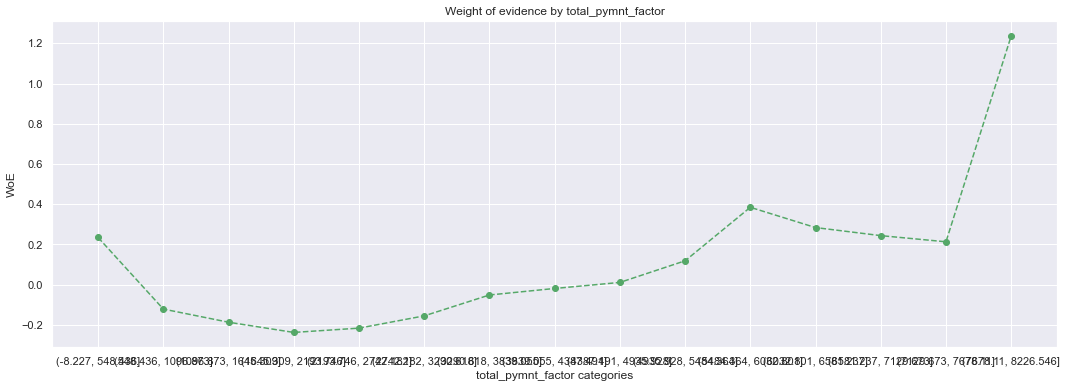

          out_prncp_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0      (-35.896, 2393.077]  36398   0.920243    0.086437  33495.0  2903.0   
1     (2393.077, 4786.154]  36272   0.988559    0.086138  35857.0   415.0   
2     (4786.154, 7179.231]  46701   0.987859    0.110904  46134.0   567.0   
3     (7179.231, 9572.308]  51581   0.987941    0.122493  50959.0   622.0   
4    (9572.308, 11965.385]  50230   0.986303    0.119285  49542.0   688.0   
5   (11965.385, 14358.462]  41258   0.986936    0.097978  40719.0   539.0   
6   (14358.462, 16751.539]  34258   0.987156    0.081355  33818.0   440.0   
7   (16751.539, 19144.616]  31157   0.986038    0.073991  30722.0   435.0   
8   (19144.616, 21537.693]  23700   0.986667    0.056282  23384.0   316.0   
9    (21537.693, 23930.77]  20856   0.988013    0.049528  20606.0   250.0   
10   (23930.77, 26323.847]  13953   0.989680    0.033135  13809.0   144.0   
11  (26323.847, 28716.924]  11497   0.986431    0.027303  11341.0   156.0   

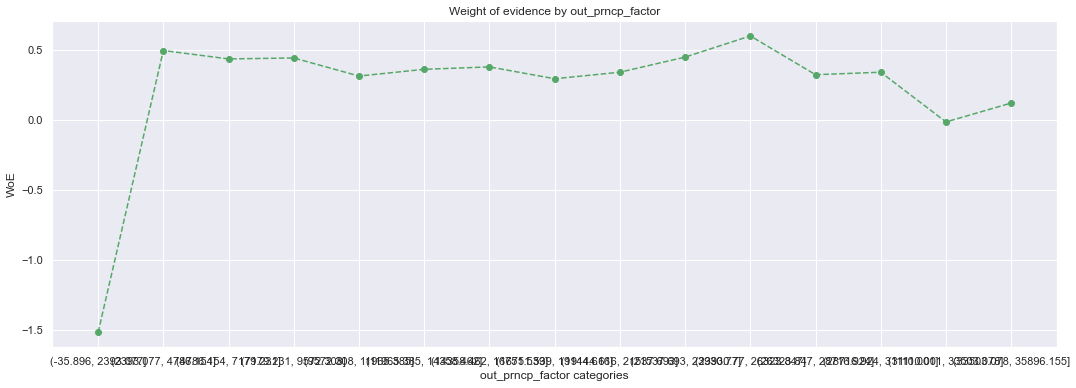

     int_rate_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0       (5.3, 6.647]  23924   0.997994    0.056814  23876.0    48.0   
1     (6.647, 7.973]  47011   0.996001    0.111640  46823.0   188.0   
2       (7.973, 9.3]  44580   0.993674    0.105867  44298.0   282.0   
3      (9.3, 10.627]  26744   0.990839    0.063511  26499.0   245.0   
4   (10.627, 11.953]  46214   0.990349    0.109747  45768.0   446.0   
5    (11.953, 13.28]  58759   0.984343    0.139539  57839.0   920.0   
6    (13.28, 14.607]  48449   0.982311    0.115055  47592.0   857.0   
7   (14.607, 15.933]  32812   0.973607    0.077921  31946.0   866.0   
8    (15.933, 17.26]  25624   0.964213    0.060851  24707.0   917.0   
9    (17.26, 18.587]  34532   0.966987    0.082005  33392.0  1140.0   
10  (18.587, 19.913]   9509   0.950678    0.022582   9040.0   469.0   
11   (19.913, 21.24]   9333   0.956284    0.022164   8925.0   408.0   
12   (21.24, 22.567]   3845   0.935761    0.009131   3598.0   247.0   
13  (2

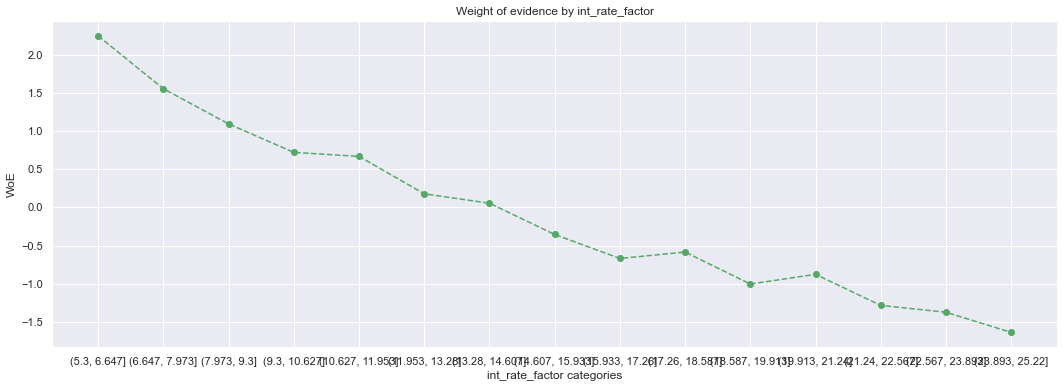

   mths_since_issue_d_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0           (90.989, 91.733]  44342   1.000000    0.105302  44342.0     0.0   
1           (91.733, 92.467]  37530   0.998082    0.089125  37458.0    72.0   
2             (92.467, 93.2]  48631   0.997327    0.115487  48501.0   130.0   
3             (93.2, 93.933]      0        NaN    0.000000      NaN     NaN   
4           (93.933, 94.667]  28641   0.993401    0.068016  28452.0   189.0   
5             (94.667, 95.4]  35886   0.990721    0.085221  35553.0   333.0   
6             (95.4, 96.133]  45962   0.984509    0.109149  45250.0   712.0   
7           (96.133, 96.867]      0        NaN    0.000000      NaN     NaN   
8             (96.867, 97.6]  28485   0.978866    0.067645  27883.0   602.0   
9             (97.6, 98.333]  31913   0.972644    0.075786  31040.0   873.0   
10          (98.333, 99.067]  35427   0.967878    0.084131  34289.0  1138.0   
11            (99.067, 99.8]      0        NaN    0.

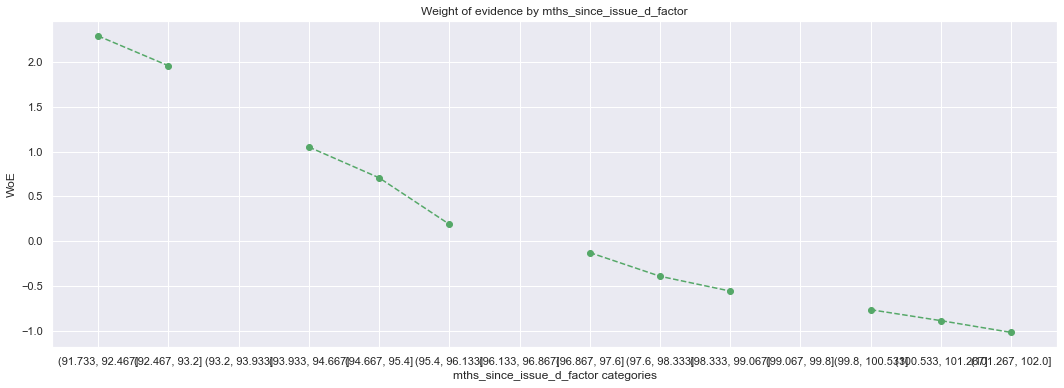

In [107]:
for col in num.columns:
    num[col+'_factor'] = pd.cut(num[col], 15)
    df_temp = woe_ordered_continuous(num, col+'_factor', y)
    print(df_temp)
    plot_woe(df_temp)
    dict = {}
    for i in df_temp.index:
        dict[df_temp.iloc[i, 0]] = df_temp.loc[i, 'WoE']
    num1[col+'_'] = num1[col].map(dict)
    num1[col+'_'] = np.where(num1[col+'_'].isin([np.inf, -np.inf]), num1[col+'_'].min(), num1[col+'_'])
    num1.drop(col, axis = 1, inplace = True)
    num.drop(col, axis = 1, inplace = True)

In [108]:
num.head()

,mths_since_last_delinq_factor,total_acc_factor,open_acc_factor,dti_factor,annual_inc_factor,emp_length_factor,revol_util_factor,total_rev_hi_lim_factor,tot_cur_bal_factor,mths_since_earliest_cr_line_factor,total_rec_int_factor,total_pymnt_factor,out_prncp_factor,int_rate_factor,mths_since_issue_d_factor
0,"(4.733, 9.467]","(41.033, 44.4]","(23.867, 25.5]","(17.786, 20.75]","(64091.25, 74773.125]","(0.667, 1.333]","(75.66, 84.067]","(38539.958, 44045.667]","(31475.35, 62950.7]","(255.333, 280.8]","(-2.476, 165.037]","(-8.227, 548.436]","(-35.896, 2393.077]","(11.953, 13.28]","(93.933, 94.667]"
1,"(33.133, 37.867]","(37.667, 41.033]","(12.433, 14.067]","(23.715, 26.679]","(32045.625, 42727.5]","(6.667, 7.333]","(33.627, 42.033]","(11011.417, 16517.125]","(157376.75, 188852.1]","(229.867, 255.333]","(-2.476, 165.037]","(7678.11, 8226.546]","(-35.896, 2393.077]","(11.953, 13.28]","(93.933, 94.667]"
2,"(4.733, 9.467]","(34.3, 37.667]","(17.333, 18.967]","(29.643, 32.608]","(21363.75, 32045.625]","(5.333, 6.0]","(67.253, 75.66]","(11011.417, 16517.125]","(188852.1, 220327.45]","(204.4, 229.867]","(-2.476, 165.037]","(-8.227, 548.436]","(-35.896, 2393.077]","(9.3, 10.627]","(93.933, 94.667]"
3,"(4.733, 9.467]","(37.667, 41.033]","(17.333, 18.967]","(29.643, 32.608]","(42727.5, 53409.375]","(9.333, 10.0]","(58.847, 67.253]","(33034.25, 38539.958]","(94426.05, 125901.4]","(280.8, 306.267]","(-2.476, 165.037]","(-8.227, 548.436]","(-35.896, 2393.077]","(10.627, 11.953]","(93.933, 94.667]"
4,"(66.267, 71.0]","(24.2, 27.567]","(7.533, 9.167]","(29.643, 32.608]","(32045.625, 42727.5]","(9.333, 10.0]","(25.22, 33.627]","(11011.417, 16517.125]","(31475.35, 62950.7]","(280.8, 306.267]","(-2.476, 165.037]","(-8.227, 548.436]","(-35.896, 2393.077]","(19.913, 21.24]","(93.933, 94.667]"


In [109]:
num1.head()

,term_,inq_last_6mths_,mths_since_last_pymnt_d_,mths_since_last_delinq_,total_acc_,open_acc_,dti_,annual_inc_,emp_length_,revol_util_,total_rev_hi_lim_,tot_cur_bal_,mths_since_earliest_cr_line_,total_rec_int_,total_pymnt_,out_prncp_,int_rate_,mths_since_issue_d_
0,0.126396,-0.142032,0.100290,-0.013570,0.044634,0.128447,0.112995,0.078399,-0.183366,-0.098763,0.111036,-0.170118,0.010019,0.422998,0.234578,-1.517743,0.177650,1.050832
1,0.126396,0.208631,-2.945763,0.137877,0.101008,0.047862,-0.094555,-0.225870,-0.111582,0.122983,-0.147419,0.135770,-0.092245,0.422998,NaN,-1.517743,0.177650,1.050832
2,0.126396,-0.142032,-2.945763,-0.013570,0.074843,0.088035,-0.295228,-0.286324,-0.122546,-0.047575,-0.147419,0.147571,-0.201381,0.422998,0.234578,-1.517743,0.720209,1.050832
3,0.126396,-0.362055,-2.945763,-0.013570,0.101008,0.088035,-0.295228,-0.068612,0.105183,0.011912,0.090107,0.047568,0.062692,0.422998,0.234578,-1.517743,0.667627,1.050832
4,0.126396,-0.664329,-2.945763,0.112801,-0.006408,-0.000130,-0.295228,-0.225870,0.105183,0.129658,-0.147419,-0.170118,0.062692,0.422998,0.234578,-1.517743,-0.878050,1.050832


In [110]:
num.shape, num1.shape

((421094, 15), (421094, 18))

In [111]:
num1.isnull().mean()

term_                           0.000000
inq_last_6mths_                 0.000000
mths_since_last_pymnt_d_        0.000000
mths_since_last_delinq_         0.000000
total_acc_                      0.000000
open_acc_                       0.000000
dti_                            0.000000
annual_inc_                     0.000000
emp_length_                     0.000000
revol_util_                     0.000000
total_rev_hi_lim_               0.000000
tot_cur_bal_                    0.000000
mths_since_earliest_cr_line_    0.000000
total_rec_int_                  0.058500
total_pymnt_                    0.065821
out_prncp_                      0.000000
int_rate_                       0.000000
mths_since_issue_d_             0.000000
dtype: float64

In [112]:
#num1.dropna(inplace = True)

In [113]:
num1.shape

(421094, 18)

In [114]:
cat.head()

,grade_,home_ownership_,verification_status_,purpose_,initial_list_status_
0,0.066882,-0.032594,-0.013348,-0.077800,0.322444
1,0.066882,0.225190,-0.013348,-0.077800,0.322444
2,0.749074,0.225190,-0.013348,-0.077800,-0.395842
3,0.749074,0.225190,-0.013348,0.432037,-0.395842
4,-0.862345,-0.217368,-0.235047,-0.077800,0.322444


In [115]:
num1.shape, cat.shape

((421094, 18), (421094, 5))

In [116]:
df_final = pd.concat([num1, cat, df['good_bad']], axis = 1)

In [117]:
df_final.shape

(421094, 24)

In [118]:
df_final.dropna(inplace = True)

In [4]:
## Replacing and Removing all unneccesary values and data preparation

In [119]:
df_final = df_final.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

In [120]:
df_final.head()

,term_,inq_last_6mths_,mths_since_last_pymnt_d_,mths_since_last_delinq_,total_acc_,open_acc_,dti_,annual_inc_,emp_length_,revol_util_,total_rev_hi_lim_,tot_cur_bal_,mths_since_earliest_cr_line_,total_rec_int_,total_pymnt_,out_prncp_,int_rate_,mths_since_issue_d_,grade_,home_ownership_,verification_status_,purpose_,initial_list_status_,good_bad
0,0.126396,-0.142032,0.100290,-0.013570,0.044634,0.128447,0.112995,0.078399,-0.183366,-0.098763,0.111036,-0.170118,0.010019,0.422998,0.234578,-1.517743,0.177650,1.050832,0.066882,-0.032594,-0.013348,-0.077800,0.322444,0
2,0.126396,-0.142032,-2.945763,-0.013570,0.074843,0.088035,-0.295228,-0.286324,-0.122546,-0.047575,-0.147419,0.147571,-0.201381,0.422998,0.234578,-1.517743,0.720209,1.050832,0.749074,0.225190,-0.013348,-0.077800,-0.395842,0
3,0.126396,-0.362055,-2.945763,-0.013570,0.101008,0.088035,-0.295228,-0.068612,0.105183,0.011912,0.090107,0.047568,0.062692,0.422998,0.234578,-1.517743,0.667627,1.050832,0.749074,0.225190,-0.013348,0.432037,-0.395842,0
4,0.126396,-0.664329,-2.945763,0.112801,-0.006408,-0.000130,-0.295228,-0.225870,0.105183,0.129658,-0.147419,-0.170118,0.062692,0.422998,0.234578,-1.517743,-0.878050,1.050832,-0.862345,-0.217368,-0.235047,-0.077800,0.322444,0
5,-0.219486,0.208631,-2.945763,0.019923,0.021321,-0.000130,0.296000,0.078399,0.105183,0.136531,-0.046803,0.104216,0.062692,0.176521,0.234578,-1.517743,-0.355478,0.707242,0.066882,0.225190,0.345926,-0.077800,0.322444,0


In [121]:
x = df_final.drop('good_bad', axis = 1)
y = df_final['good_bad']

In [122]:
df_final.head()

,term_,inq_last_6mths_,mths_since_last_pymnt_d_,mths_since_last_delinq_,total_acc_,open_acc_,dti_,annual_inc_,emp_length_,revol_util_,total_rev_hi_lim_,tot_cur_bal_,mths_since_earliest_cr_line_,total_rec_int_,total_pymnt_,out_prncp_,int_rate_,mths_since_issue_d_,grade_,home_ownership_,verification_status_,purpose_,initial_list_status_,good_bad
0,0.126396,-0.142032,0.100290,-0.013570,0.044634,0.128447,0.112995,0.078399,-0.183366,-0.098763,0.111036,-0.170118,0.010019,0.422998,0.234578,-1.517743,0.177650,1.050832,0.066882,-0.032594,-0.013348,-0.077800,0.322444,0
2,0.126396,-0.142032,-2.945763,-0.013570,0.074843,0.088035,-0.295228,-0.286324,-0.122546,-0.047575,-0.147419,0.147571,-0.201381,0.422998,0.234578,-1.517743,0.720209,1.050832,0.749074,0.225190,-0.013348,-0.077800,-0.395842,0
3,0.126396,-0.362055,-2.945763,-0.013570,0.101008,0.088035,-0.295228,-0.068612,0.105183,0.011912,0.090107,0.047568,0.062692,0.422998,0.234578,-1.517743,0.667627,1.050832,0.749074,0.225190,-0.013348,0.432037,-0.395842,0
4,0.126396,-0.664329,-2.945763,0.112801,-0.006408,-0.000130,-0.295228,-0.225870,0.105183,0.129658,-0.147419,-0.170118,0.062692,0.422998,0.234578,-1.517743,-0.878050,1.050832,-0.862345,-0.217368,-0.235047,-0.077800,0.322444,0
5,-0.219486,0.208631,-2.945763,0.019923,0.021321,-0.000130,0.296000,0.078399,0.105183,0.136531,-0.046803,0.104216,0.062692,0.176521,0.234578,-1.517743,-0.355478,0.707242,0.066882,0.225190,0.345926,-0.077800,0.322444,0


## Train Test Split for Model building

In [123]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, stratify = y)

In [124]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((301014, 23), (75254, 23), (301014,), (75254,))

## Model Building using Logistic regression

In [125]:
reg = LogisticRegression(max_iter = 1000, class_weight = "balanced")

In [126]:
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 3, random_state = 0)

In [127]:
scores = cross_val_score(reg, xtrain, ytrain, scoring = 'roc_auc', cv = cv)

In [128]:
reg1 = LogisticRegression(max_iter = 1000, class_weight = "balanced")

In [129]:
AUROC = np.mean(scores)
GINI = AUROC * 2 - 1

# print the mean AUROC score and Gini
print('Mean AUROC: %.4f' % (AUROC))
print('Gini: %.4f' % (GINI))

Mean AUROC: 0.9700
Gini: 0.9400


In [130]:
reg.fit(xtrain, ytrain)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [131]:
np.transpose(reg.coef_)

array([[-1.33703673],
       [ 0.31623153],
       [ 1.21570635],
       [ 1.05961343],
       [-0.75227029],
       [ 1.14151075],
       [ 0.27367831],
       [-0.42356411],
       [ 0.76844109],
       [ 0.76977927],
       [ 0.20109861],
       [-0.0434517 ],
       [-0.02184269],
       [ 1.44955041],
       [ 1.09921911],
       [ 0.31049396],
       [ 0.5265759 ],
       [ 0.00986414],
       [ 0.26274639],
       [ 0.42198425],
       [ 0.07313508],
       [ 0.36511075],
       [ 0.26864538]])

In [132]:
summary = pd.DataFrame(columns = ['Feature Name'], data = xtrain.columns.values)

In [133]:
summary['Coefficient'] = np.transpose(reg.coef_)

## Summary of all features

In [134]:
summary

,Feature Name,Coefficient
0,term_,-1.337037
1,inq_last_6mths_,0.316232
2,mths_since_last_pymnt_d_,1.215706
3,mths_since_last_delinq_,1.059613
4,total_acc_,-0.752270
5,open_acc_,1.141511
6,dti_,0.273678
7,annual_inc_,-0.423564
8,emp_length_,0.768441
9,revol_util_,0.769779


In [135]:
summary.index = summary.index + 1

In [136]:
summary.loc[0] = ['Intercept', reg.intercept_[0]]

In [137]:
summary.sort_index(inplace = True)

In [138]:
y_hat = reg.predict(xtest)

In [139]:
y_hat_prob = reg.predict_proba(xtest)

In [140]:
y_hat_prob

array([[0.09570761, 0.90429239],
       [0.03354368, 0.96645632],
       [0.00733592, 0.99266408],
       ...,
       [0.37097188, 0.62902812],
       [0.01217152, 0.98782848],
       [0.00900959, 0.99099041]])

In [141]:
y_hat_prob = y_hat_prob[:][:,1]

In [142]:
y_val = ytest.copy()

In [143]:
y_val.reset_index(drop = True, inplace = True)

In [144]:
test_res = pd.concat([pd.DataFrame(y_hat_prob), y_val], axis = 1)
test_res

,0,good_bad
0,0.904292,1
1,0.966456,1
2,0.992664,1
3,0.707342,1
4,0.997565,1
...,...,...
75249,0.830041,1
75250,0.980829,1
75251,0.629028,0
75252,0.987828,1


In [145]:
test_res.columns = ['Predicted Test Result', 'Actual Test value']

In [146]:
test_res

,Predicted Test Result,Actual Test value
0,0.904292,1
1,0.966456,1
2,0.992664,1
3,0.707342,1
4,0.997565,1
...,...,...
75249,0.830041,1
75250,0.980829,1
75251,0.629028,0
75252,0.987828,1


## Deciding threshold = 0.25. If < 0.25 then 0 else 1

In [147]:
tr = 0.25

test_res['y_final'] = np.where(test_res['Predicted Test Result'] > tr, 1, 0)

In [148]:
test_res['y_final'].head()

0    1
1    1
2    1
3    1
4    1
Name: y_final, dtype: int32

## Confusion Matrix, ROC Curve, FPR, TPR calculation

In [149]:
confusion_matrix(test_res['y_final'], test_res['Actual Test value'], normalize = 'all')

array([[0.01661041, 0.01356739],
       [0.00264438, 0.96717782]])

In [150]:
roc_curve(test_res['Actual Test value'],test_res['Predicted Test Result'])

(array([0.        , 0.        , 0.        , ..., 0.99171843, 0.99171843,
        1.        ]),
 array([0.00000000e+00, 1.35492175e-05, 7.31657747e-02, ...,
        9.99986451e-01, 1.00000000e+00, 1.00000000e+00]),
 array([1.99839314e+00, 9.98393137e-01, 9.89974473e-01, ...,
        1.74432620e-03, 1.72234384e-03, 6.60087340e-04]))

In [151]:
fpr, tpr, thresholds = roc_curve(test_res['Actual Test value'],
                                 test_res['Predicted Test Result'])
fpr, tpr, thresholds

(array([0.        , 0.        , 0.        , ..., 0.99171843, 0.99171843,
        1.        ]),
 array([0.00000000e+00, 1.35492175e-05, 7.31657747e-02, ...,
        9.99986451e-01, 1.00000000e+00, 1.00000000e+00]),
 array([1.99839314e+00, 9.98393137e-01, 9.89974473e-01, ...,
        1.74432620e-03, 1.72234384e-03, 6.60087340e-04]))

In [152]:
test_res.shape

(75254, 3)

In [153]:
test_res.head()

,Predicted Test Result,Actual Test value,y_final
0,0.904292,1,1
1,0.966456,1,1
2,0.992664,1,1
3,0.707342,1,1
4,0.997565,1,1


Text(0.5, 1.0, 'ROC curve')

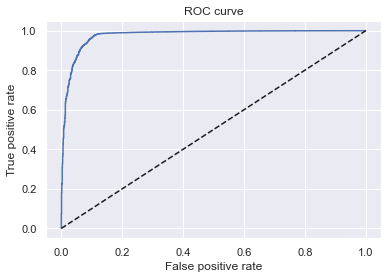

In [154]:
# plot the ROC curve
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [155]:
precision, recall, thresholds = precision_recall_curve(test_res['Actual Test value'],
                                 test_res['Predicted Test Result'])

In [156]:
precision, recall, thresholds

(array([0.98074521, 0.98075824, 0.98077128, ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        2.70984351e-05, 1.35492175e-05, 0.00000000e+00]),
 array([6.60087340e-04, 9.41554994e-04, 1.05887305e-03, ...,
        9.97937998e-01, 9.98040199e-01, 9.98393137e-01]))

In [157]:
no_skill = len(ytest[ytest == 1]) / len(y)
no_skill

0.19615008451422922

Text(0.5, 1.0, 'PR curve')

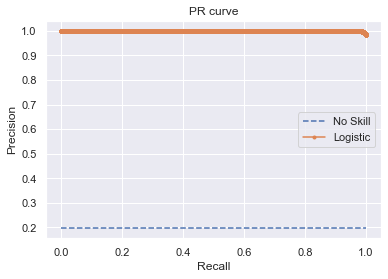

In [158]:
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

plt.plot(recall, precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('PR curve')

## ROC and Gini calculation

In [159]:
AUCROC = roc_auc_score(test_res['Actual Test value'], test_res['y_final'])

In [160]:
AUCROC

0.9244150775206467

In [161]:
Gini = AUROC * 2 - 1
Gini

0.9399587234616418

In [162]:
summary

,Feature Name,Coefficient
0,Intercept,-0.412400
1,term_,-1.337037
2,inq_last_6mths_,0.316232
3,mths_since_last_pymnt_d_,1.215706
4,mths_since_last_delinq_,1.059613
5,total_acc_,-0.752270
6,open_acc_,1.141511
7,dti_,0.273678
8,annual_inc_,-0.423564
9,emp_length_,0.768441


# Scorecard creation

In [163]:
min_score = 300
max_score = 850

In [164]:
xtrain

,term_,inq_last_6mths_,mths_since_last_pymnt_d_,mths_since_last_delinq_,total_acc_,open_acc_,dti_,annual_inc_,emp_length_,revol_util_,total_rev_hi_lim_,tot_cur_bal_,mths_since_earliest_cr_line_,total_rec_int_,total_pymnt_,out_prncp_,int_rate_,mths_since_issue_d_,grade_,home_ownership_,verification_status_,purpose_,initial_list_status_
86283,0.126396,0.208631,1.181454,-0.003401,0.008768,-0.033247,0.112995,-0.225870,0.105183,-0.047575,-0.147419,-0.121558,0.261744,0.422998,0.234578,-1.517743,-0.355478,1.958410,-0.570298,0.225190,-0.013348,-0.459536,-0.395842
148353,0.126396,0.208631,2.685183,-0.013570,0.008768,-0.023311,0.296000,-0.225870,-0.122546,0.095610,-0.046803,0.104216,0.192328,0.422998,-0.121338,0.495621,1.093393,0.707242,0.749074,0.225190,0.345926,0.432037,0.322444
210985,0.126396,0.208631,2.685183,-0.013570,-0.083788,-0.000130,0.112995,-0.225870,-0.183366,0.136531,-0.147419,-0.121558,-0.201381,-0.016186,-0.186712,0.435551,-0.669660,0.188485,-0.570298,-0.217368,0.345926,0.432037,0.322444
116761,-0.219486,0.208631,2.685183,-0.212562,0.061716,-0.023311,0.093327,-0.068612,0.105183,0.122983,-0.147419,-0.121558,0.089221,-0.016186,-0.186712,0.448482,0.720209,1.958410,0.749074,-0.217368,-0.013348,-0.228919,0.322444
236660,0.126396,-0.664329,2.685183,-0.013570,0.074843,-0.081879,0.093327,0.112956,0.105183,-0.098763,0.111036,0.136721,0.234777,-0.134813,0.011112,0.378579,0.667627,-0.127880,0.749074,0.225190,-0.013348,0.432037,0.322444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286180,0.126396,-0.142032,1.181454,-0.013570,0.010814,0.083724,-0.232606,-0.013659,-0.162847,-0.169167,0.090107,0.047568,0.062692,-0.253631,0.384656,0.293993,0.177650,-0.557843,0.066882,-0.217368,-0.013348,0.432037,0.322444
191066,-0.219486,-0.142032,2.685183,-0.013570,-0.042370,-0.023311,0.211481,0.180519,-0.022914,0.011912,0.090107,0.430845,0.261744,-0.214159,-0.051329,0.599868,1.093393,0.188485,0.749074,0.225190,0.345926,-0.077800,-0.395842
94002,-0.219486,-0.664329,2.685183,-0.013570,0.056551,-0.023311,0.296000,0.280640,0.105183,0.129658,0.066662,0.225789,0.089221,0.082310,-0.121338,0.313392,0.053587,1.958410,0.066882,0.225190,0.345926,-0.077800,0.322444
154159,-0.219486,0.208631,1.181454,-0.013570,0.008768,0.047862,0.236310,0.078399,0.105183,-0.121159,0.356219,0.300372,0.089221,-0.214159,-0.216169,0.340670,0.720209,0.707242,0.749074,0.225190,-0.013348,-0.077800,0.322444


In [165]:
test_res

,Predicted Test Result,Actual Test value,y_final
0,0.904292,1,1
1,0.966456,1,1
2,0.992664,1,1
3,0.707342,1,1
4,0.997565,1,1
...,...,...,...
75249,0.830041,1,1
75250,0.980829,1,1
75251,0.629028,0,1
75252,0.987828,1,1


## Score calculation using following 2 conditions

In [166]:
test_res['odds'] = (1 - test_res['Predicted Test Result']) / test_res['Predicted Test Result']

In [167]:
test_res['log_odds'] = np.log(test_res['odds'])

In [168]:
test_res['log_odds'].min(), test_res['log_odds'].max()

(-6.43186334419736, 7.322478092411365)

Assuming, Score of 600 corresponds to odds ratio 50:1 & Increment n score by 40 points result in odds ratio 100:1

As, Score = Offset + Factor * ln(odds)

On solving using above both conditions we will get,

In [169]:
# Using these 2, calculate score for all
factor = 57.14
offset = 376.58

In [170]:
test_res['Score'] = offset + (factor * test_res['log_odds'])

In [171]:
act_min = test_res['Score'].min()
act_max = test_res['Score'].max()

In [172]:
max_score = 950
min_score = 250

## Logic to change score range

In [173]:
act_min, act_max

(9.063328512562805, 794.9863982003853)

In [174]:
test_res['Score_actual'] = ((test_res['Score'] - act_min) / (act_max - act_min) * (max_score - min_score) + min_score)

In [175]:
test_res['Score_actual'].min(), test_res['Score_actual'].max()

(250.0, 950.0)

In [176]:
df_final.head()

,term_,inq_last_6mths_,mths_since_last_pymnt_d_,mths_since_last_delinq_,total_acc_,open_acc_,dti_,annual_inc_,emp_length_,revol_util_,total_rev_hi_lim_,tot_cur_bal_,mths_since_earliest_cr_line_,total_rec_int_,total_pymnt_,out_prncp_,int_rate_,mths_since_issue_d_,grade_,home_ownership_,verification_status_,purpose_,initial_list_status_,good_bad
0,0.126396,-0.142032,0.100290,-0.013570,0.044634,0.128447,0.112995,0.078399,-0.183366,-0.098763,0.111036,-0.170118,0.010019,0.422998,0.234578,-1.517743,0.177650,1.050832,0.066882,-0.032594,-0.013348,-0.077800,0.322444,0
2,0.126396,-0.142032,-2.945763,-0.013570,0.074843,0.088035,-0.295228,-0.286324,-0.122546,-0.047575,-0.147419,0.147571,-0.201381,0.422998,0.234578,-1.517743,0.720209,1.050832,0.749074,0.225190,-0.013348,-0.077800,-0.395842,0
3,0.126396,-0.362055,-2.945763,-0.013570,0.101008,0.088035,-0.295228,-0.068612,0.105183,0.011912,0.090107,0.047568,0.062692,0.422998,0.234578,-1.517743,0.667627,1.050832,0.749074,0.225190,-0.013348,0.432037,-0.395842,0
4,0.126396,-0.664329,-2.945763,0.112801,-0.006408,-0.000130,-0.295228,-0.225870,0.105183,0.129658,-0.147419,-0.170118,0.062692,0.422998,0.234578,-1.517743,-0.878050,1.050832,-0.862345,-0.217368,-0.235047,-0.077800,0.322444,0
5,-0.219486,0.208631,-2.945763,0.019923,0.021321,-0.000130,0.296000,0.078399,0.105183,0.136531,-0.046803,0.104216,0.062692,0.176521,0.234578,-1.517743,-0.355478,0.707242,0.066882,0.225190,0.345926,-0.077800,0.322444,0


In [177]:
summary

,Feature Name,Coefficient
0,Intercept,-0.412400
1,term_,-1.337037
2,inq_last_6mths_,0.316232
3,mths_since_last_pymnt_d_,1.215706
4,mths_since_last_delinq_,1.059613
5,total_acc_,-0.752270
6,open_acc_,1.141511
7,dti_,0.273678
8,annual_inc_,-0.423564
9,emp_length_,0.768441


In [178]:
df_score = pd.concat([xtest, ytest], axis = 1)

In [179]:
df_score.shape

(75254, 24)

In [180]:
df_score.reset_index(inplace = True, drop = True)

In [181]:
df_score = df_score.loc[:50000,:]
df_score.shape

(50001, 24)

In [182]:
ytest_new = df_score['good_bad']
df_score_new = df_score.drop('good_bad', axis = 1)
ytest_new.shape, df_score_new.shape

((50001,), (50001, 23))

In [183]:
col_list = df_score_new.columns.tolist()
col_list

['term_',
 'inq_last_6mths_',
 'mths_since_last_pymnt_d_',
 'mths_since_last_delinq_',
 'total_acc_',
 'open_acc_',
 'dti_',
 'annual_inc_',
 'emp_length_',
 'revol_util_',
 'total_rev_hi_lim_',
 'tot_cur_bal_',
 'mths_since_earliest_cr_line_',
 'total_rec_int_',
 'total_pymnt_',
 'out_prncp_',
 'int_rate_',
 'mths_since_issue_d_',
 'grade_',
 'home_ownership_',
 'verification_status_',
 'purpose_',
 'initial_list_status_']

# Method 2

## Score calculation based on individual variable, using Offset and Factor calculation

In [184]:
for i in range(df_score_new.shape[0]):
    for j in range(df_score_new.shape[1]):
        var = col_list[j]
        #idx = summary('Feature Name').loc[lambda x: x == var].index
        #print(var)
        idx = summary[summary['Feature Name'] == var].index[0]
        #print(idx)
        df_score_new.iloc[i,j] = ((offset / 22) + ((df_score.iloc[i,j] * summary.loc[idx, 'Coefficient']) + (summary.loc[0,'Coefficient'] / 22)) * factor)

In [185]:
df_score_new.head()

,term_,inq_last_6mths_,mths_since_last_pymnt_d_,mths_since_last_delinq_,total_acc_,open_acc_,dti_,annual_inc_,emp_length_,revol_util_,total_rev_hi_lim_,tot_cur_bal_,mths_since_earliest_cr_line_,total_rec_int_,total_pymnt_,out_prncp_,int_rate_,mths_since_issue_d_,grade_,home_ownership_,verification_status_,purpose_,initial_list_status_
0,6.389684,13.479708,202.573636,3.176326,12.829037,21.815287,14.567513,13.312342,7.994775,11.702047,18.981950,15.679764,15.934801,-1.692038,14.858246,21.775440,21.391388,16.638445,17.050277,21.475977,15.990376,25.059500,9.969827
1,6.389684,13.479708,202.573636,22.875859,17.867407,13.566741,17.505609,9.253977,20.664604,8.605325,15.508358,16.430936,16.033652,30.666903,8.424992,22.762761,36.134072,17.337402,27.292248,10.804937,15.063912,14.423053,20.995795
2,6.389684,4.042078,202.573636,15.224536,13.615335,21.146389,17.813168,17.706736,7.994775,22.802295,22.666732,16.347964,16.033652,51.081984,8.424992,23.895792,83.626031,17.149990,40.795663,10.804937,17.491760,14.423053,20.995795
3,6.389684,19.816008,98.116433,15.224536,19.631472,13.877621,17.505609,17.706736,15.141962,13.953562,12.561752,16.347964,16.161287,22.863709,1.129577,23.895792,21.391388,16.152394,17.050277,10.804937,15.063912,11.270348,20.995795
4,6.389684,19.816008,202.573636,24.394104,19.647753,13.877621,19.741571,26.788871,20.664604,13.953562,12.561752,16.347964,15.806114,51.081984,30.779887,23.773545,83.626031,17.337402,40.795663,15.260255,15.063912,25.059500,20.995795


In [186]:
df_score.head()

,term_,inq_last_6mths_,mths_since_last_pymnt_d_,mths_since_last_delinq_,total_acc_,open_acc_,dti_,annual_inc_,emp_length_,revol_util_,total_rev_hi_lim_,tot_cur_bal_,mths_since_earliest_cr_line_,total_rec_int_,total_pymnt_,out_prncp_,int_rate_,mths_since_issue_d_,grade_,home_ownership_,verification_status_,purpose_,initial_list_status_,good_bad
0,0.126396,-0.142032,2.685183,-0.212562,0.074843,0.088448,-0.094555,0.112956,-0.183366,-0.098763,0.255491,0.147571,0.089221,-0.214159,-0.018913,0.322929,0.177650,1.050832,0.066882,0.225190,-0.013348,0.432037,-0.395842,1
1,0.126396,-0.142032,2.685183,0.112801,-0.042370,-0.038013,0.093327,0.280640,0.105183,-0.169167,-0.046803,-0.154976,0.010019,0.176521,-0.121338,0.378579,0.667627,2.290915,0.749074,-0.217368,-0.235047,-0.077800,0.322444,1
2,0.126396,-0.664329,2.685183,-0.013570,0.056551,0.078193,0.112995,-0.068612,-0.183366,0.153600,0.576164,-0.121558,0.010019,0.422998,-0.121338,0.442442,2.246033,1.958410,1.648502,-0.217368,0.345926,-0.077800,0.322444,1
3,0.126396,0.208631,1.181454,-0.013570,-0.083409,-0.033247,0.093327,-0.068612,-0.020593,-0.047575,-0.303235,-0.121558,-0.092245,0.082310,-0.237490,0.442442,0.177650,0.188485,0.066882,-0.217368,-0.235047,-0.228919,0.322444,1
4,0.126396,0.208631,2.685183,0.137877,-0.083788,-0.033247,0.236310,-0.443869,0.105183,-0.047575,-0.303235,-0.121558,0.192328,0.422998,0.234578,0.435551,2.246033,2.290915,1.648502,-0.032594,-0.235047,0.432037,0.322444,1


In [187]:
#df_score.drop('Score', axis = 1, inplace = True)

In [188]:
#df_score['Score'] = df_score.sum(axis = 1)

In [189]:
#df_score['Score'] = round(df_score['Score'],0)

In [190]:
#df_score['Score'].min(), df_score['Score'].max()

## Score calculation based on score individual variable has received for each variable

In [191]:
df_score_new['Score'] = df_score_new.sum(axis = 1)

In [192]:
df_score_new['Score'].min(), df_score_new['Score'].max()

(-25.78024103042305, 748.7769468554591)

In [193]:
max_score = 950
min_score = 250

## Neutral Score
Neutral score is most important parameter to judge individual performance of each account based on every parameter 
and help team to identify where a Customer lag and where he can improvise to get effective loan.

If a customer has majority of variable score below Neutral Score we can identify him as potential High risk customer,
though this can be subject to further analysis. But customer with more red flag could be customer with low score and high PD

In [194]:
neutral_score = ((summary.loc[0,'Coefficient'] / 22) * factor) + (offset / 22)

In [195]:
neutral_score

16.046157169962378

### Red flag creation

In [196]:
df_score_new['Red_Flag'] = 0

In [197]:
for i in range(df_score_new.shape[0]):
    count = 0
    for j in range(df_score_new.shape[1]):
        if df_score_new.iloc[i,j] <= neutral_score:
            count += 1
    df_score_new.loc[i, 'Red_Flag'] = count
    #df_score.loc[i, 'Red_Flag'] = df_score[df_score.loc[i,:] > neutral_score].count()

In [198]:
df_score_new.head()

,term_,inq_last_6mths_,mths_since_last_pymnt_d_,mths_since_last_delinq_,total_acc_,open_acc_,dti_,annual_inc_,emp_length_,revol_util_,total_rev_hi_lim_,tot_cur_bal_,mths_since_earliest_cr_line_,total_rec_int_,total_pymnt_,out_prncp_,int_rate_,mths_since_issue_d_,grade_,home_ownership_,verification_status_,purpose_,initial_list_status_,Score,Red_Flag
0,6.389684,13.479708,202.573636,3.176326,12.829037,21.815287,14.567513,13.312342,7.994775,11.702047,18.981950,15.679764,15.934801,-1.692038,14.858246,21.775440,21.391388,16.638445,17.050277,21.475977,15.990376,25.059500,9.969827,520.954306,15
1,6.389684,13.479708,202.573636,22.875859,17.867407,13.566741,17.505609,9.253977,20.664604,8.605325,15.508358,16.430936,16.033652,30.666903,8.424992,22.762761,36.134072,17.337402,27.292248,10.804937,15.063912,14.423053,20.995795,584.661571,12
2,6.389684,4.042078,202.573636,15.224536,13.615335,21.146389,17.813168,17.706736,7.994775,22.802295,22.666732,16.347964,16.033652,51.081984,8.424992,23.895792,83.626031,17.149990,40.795663,10.804937,17.491760,14.423053,20.995795,673.046977,10
3,6.389684,19.816008,98.116433,15.224536,19.631472,13.877621,17.505609,17.706736,15.141962,13.953562,12.561752,16.347964,16.161287,22.863709,1.129577,23.895792,21.391388,16.152394,17.050277,10.804937,15.063912,11.270348,20.995795,443.052754,11
4,6.389684,19.816008,202.573636,24.394104,19.647753,13.877621,19.741571,26.788871,20.664604,13.953562,12.561752,16.347964,15.806114,51.081984,30.779887,23.773545,83.626031,17.337402,40.795663,15.260255,15.063912,25.059500,20.995795,736.337216,8


#### Red flag distribution

In [199]:
df_score_new['Red_Flag'].min(), df_score_new['Red_Flag'].max()

(3, 22)

In [200]:
df_score_new.loc[df_score_new['Red_Flag'] > 15].shape

(3299, 25)

In [201]:
df_final = pd.concat([df_score_new, ytest_new], axis = 1)
df_final.head()

,term_,inq_last_6mths_,mths_since_last_pymnt_d_,mths_since_last_delinq_,total_acc_,open_acc_,dti_,annual_inc_,emp_length_,revol_util_,total_rev_hi_lim_,tot_cur_bal_,mths_since_earliest_cr_line_,total_rec_int_,total_pymnt_,out_prncp_,int_rate_,mths_since_issue_d_,grade_,home_ownership_,verification_status_,purpose_,initial_list_status_,Score,Red_Flag,good_bad
0,6.389684,13.479708,202.573636,3.176326,12.829037,21.815287,14.567513,13.312342,7.994775,11.702047,18.981950,15.679764,15.934801,-1.692038,14.858246,21.775440,21.391388,16.638445,17.050277,21.475977,15.990376,25.059500,9.969827,520.954306,15,1
1,6.389684,13.479708,202.573636,22.875859,17.867407,13.566741,17.505609,9.253977,20.664604,8.605325,15.508358,16.430936,16.033652,30.666903,8.424992,22.762761,36.134072,17.337402,27.292248,10.804937,15.063912,14.423053,20.995795,584.661571,12,1
2,6.389684,4.042078,202.573636,15.224536,13.615335,21.146389,17.813168,17.706736,7.994775,22.802295,22.666732,16.347964,16.033652,51.081984,8.424992,23.895792,83.626031,17.149990,40.795663,10.804937,17.491760,14.423053,20.995795,673.046977,10,1
3,6.389684,19.816008,98.116433,15.224536,19.631472,13.877621,17.505609,17.706736,15.141962,13.953562,12.561752,16.347964,16.161287,22.863709,1.129577,23.895792,21.391388,16.152394,17.050277,10.804937,15.063912,11.270348,20.995795,443.052754,11,1
4,6.389684,19.816008,202.573636,24.394104,19.647753,13.877621,19.741571,26.788871,20.664604,13.953562,12.561752,16.347964,15.806114,51.081984,30.779887,23.773545,83.626031,17.337402,40.795663,15.260255,15.063912,25.059500,20.995795,736.337216,8,1


In [202]:
df_final['good_bad_rev'] = np.where(df_final['good_bad'] == 1, 0, 1)

In [203]:
df_final.tail()

,term_,inq_last_6mths_,mths_since_last_pymnt_d_,mths_since_last_delinq_,total_acc_,open_acc_,dti_,annual_inc_,emp_length_,revol_util_,total_rev_hi_lim_,tot_cur_bal_,mths_since_earliest_cr_line_,total_rec_int_,total_pymnt_,out_prncp_,int_rate_,mths_since_issue_d_,grade_,home_ownership_,verification_status_,purpose_,initial_list_status_,Score,Red_Flag,good_bad,good_bad_rev
49996,6.389684,13.479708,202.573636,15.224536,16.321624,13.566741,17.813168,22.975901,20.664604,11.702047,14.352197,16.347964,15.934801,9.215906,1.129577,23.895792,-4.102954,16.152394,7.484091,10.804937,15.063912,14.423053,9.969827,491.383144,16,1,0
49997,6.389684,13.479708,98.116433,15.224536,17.867407,14.525651,15.920816,16.376743,15.141962,10.716968,15.508358,16.347964,15.934801,4.879941,29.436349,23.895792,-4.102954,15.731736,7.484091,21.475977,15.063912,11.270348,9.969827,406.656050,17,1,0
49998,32.814524,19.816008,202.573636,15.224536,16.886437,24.424202,17.813168,15.127281,15.141962,20.251595,16.286007,15.928054,15.967912,14.705556,4.318909,22.090200,36.134072,17.149990,27.292248,21.475977,17.491760,14.423053,20.995795,624.332880,9,1,0
49999,6.389684,19.816008,98.116433,15.224536,17.867407,13.566741,20.675001,14.148699,20.664604,21.455568,16.286007,16.347964,15.934801,30.666903,4.318909,22.090200,62.812574,17.149990,40.795663,10.804937,15.063912,14.423053,20.995795,535.615388,10,1,0
50000,6.389684,13.479708,98.116433,22.875859,16.321624,16.037679,17.813168,21.512767,20.664604,21.455568,14.352197,16.430936,16.033652,30.666903,4.318909,23.773545,36.134072,16.152394,27.292248,21.475977,17.491760,14.423053,9.969827,503.182566,9,1,0


## Scorecard validation using AUCROC and GINI calculation

In [204]:
#Sort data in descending order of score or ascending order of Probability of Default
df_final.sort_values(by = 'Score', inplace = True)

In [205]:
df_final['good_bad_rev'].sum(), df_final['good_bad'].sum()

(938, 49063)

In [206]:
df_final['cum_sum'] = df_final['good_bad_rev'].cumsum(axis = 0)

In [207]:
df['cum_total'] = 0

In [208]:
df_final.reset_index(inplace = True, drop = True)

In [209]:
count = 1
for i in range(df_final.shape[0]):
    df_final.loc[i, 'cum_total'] = count + i

### Total Bad and Total Good Calculation

In [210]:
df_final['cum_bad_prop'] = df_final['cum_sum'] / df_final['good_bad_rev'].sum()
df_final['cum_total_prop'] = df_final['cum_total'] / df_final.shape[0]

In [211]:
df_final['AUC'] = 0

#### Calculation of AUC and GINI for score allotment

In [212]:
for i in range(df_final.shape[0]):
    if i == 0:
        df_final.loc[i, 'AUC'] = 0.5 * df_final.loc[i, 'cum_bad_prop'] * df_final.loc[i, 'cum_total_prop']
    else:
        df_final.loc[i, 'AUC'] = 0.5 * (df_final.loc[i, 'cum_bad_prop'] + df_final.loc[i-1, 'cum_bad_prop']) * (df_final.loc[i, 'cum_total_prop'] - df_final.loc[i-1, 'cum_total_prop'])

In [213]:
df_final['AUC'].sum()

0.9665053820458772

In [214]:
Gini = (2*df_final['AUC'].sum() - 1) * 100

In [215]:
Gini

93.30107640917544

# Result & Conclusion

 1. Above result suggest, model able to provide lower score for customer with high PD
 2. Model able to bifurcate beteween Good and Bad easily based on result
 3. There can be further varification to be done to evaluate Scorecard
 4. bank can have more control over each loan as score has been assigned on variable level hence each variable could be controlled individually

# Future Scope

1. More refined approach for Missing value treatment
2. Defined statistical approach for variable selection, currently too manual and less staistical
3. Outlier treatment could be more refined
4. More emphasis could be provided to remove, Multi collinearity, Homoskedasticity, Normality of variables and many others
5. More Robust models like Decision Tree, Random Forest or Boosting Algorithms could provide better result
6. Variables have been replaced with WOE values, this could be avoided and model could be built with Original values, this method can be tested
